In [11]:
import re
 
a = "+1.902-989-3863,"

#print(re.sub(r'\d≈[^.,]', '', a))

print(re.sub(r'[^0-9.]', '', a).replace('.', ','))

In [3]:
import pandas as pd

In [430]:
energy = pd.read_csv('energy.csv', sep='\t', encoding = "utf-8", parse_dates=['Дата']) 
plans = pd.read_csv('plan.csv', sep='\t', encoding = "utf-8",  parse_dates=['DateTime']) 

In [432]:
plans

,DateTime,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_status,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,...,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_status,product_4_plan,product_4_plan_cumsum,product_4_fact,product_4_fact_cumsum,product_4_accomplished
0,2015-09-01,*1500,1500,1317.735,1317.735,NaN,100.0,100.0,530.009,530.009,...,25.0,81.011,81.011,324.044000,NaN,5.0,5.0,7.997,7.997,159.940
1,2015-09-02,800,2300,755.753,2073.488,NaN,950.0,1050.0,979.918,1509.927,...,50.0,28.002,109.013,218.026000,NaN,5.0,10.0,5.600,13.597,135.970
2,2015-09-03,800,3100,729.503,2802.991,NaN,950.0,2000.0,1022.824,2532.751,...,75.0,28.018,137.031,182.708000,ТО,NaN,NaN,6.004,19.601,196.010
3,2015-09-04,800,3900,836.252,3639.243,NaN,950.0,2950.0,969.786,3502.537,...,100.0,33.785,170.816,170.816000,NaN,5.0,15.0,8.008,27.609,184.060
4,2015-09-05,800,4700,707.373,4346.616,NaN,950.0,3900.0,948.310,4450.847,...,125.0,38.857,209.673,167.738400,NaN,5.0,20.0,5.596,33.205,166.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2017-12-27,0,10000,0.000,10477.026,ремонт,NaN,10700.0,0.000,10768.460,...,600.0,0.000,741.754,123.625667,резерв,NaN,100.0,5.625,146.621,146.621
849,2017-12-28,0,10000,0.000,10477.026,ремонт,NaN,10700.0,0.000,10768.460,...,600.0,0.000,741.754,123.625667,резерв,NaN,100.0,3.233,149.854,149.854
850,2017-12-29,0,10000,0.000,10477.026,ремонт,NaN,10700.0,0.000,10768.460,...,600.0,0.000,741.754,123.625667,резерв,NaN,100.0,0.000,149.854,149.854
851,2017-12-30,0,10000,0.000,10477.026,NaN,0.0,10700.0,0.000,10768.460,...,600.0,0.000,741.754,123.625667,NaN,0.0,100.0,0.000,149.854,149.854


In [315]:
df_data = energy.merge(plans, left_on='Дата', right_on='DateTime', how='inner')\
                .drop('DateTime', axis=1)\
                .rename(columns={'Фактическое собственное потребление, МВтч':'target'})

In [458]:
def energy_preprocessing(df):
    #df.sort_values(by='Дата').reset_index(drop=True, inplace=True)
    df = df.drop(['График ППП, МВтч', 'Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час',
                  'Объем покупки МВт*час', 'В т.ч. потери, отнесенные к объему покупки',
                  'Покупка (+) / Продажа (-) на БР (BR+/-), МВтч', 'Объем покупки на БР (BR+), МВтч', 
                  'Объем продажи на БР (BR-), МВтч'], axis=1)\
    .rename(columns={'Фактическое собственное потребление, МВтч':'target'})
    df['Характерный день'] = df['Характерный день'].map({'рабочий день':0, 'выходной':1})
    df['Характерный час'] = df['Характерный час'].map({'полупик':0, 'минимум':1,'пик':2}).astype('int')
    df['target'] = df['target'].apply(lambda x: float(str(x).replace(',', '.')))
    
    return df

In [464]:
energy = pd.read_csv('energy.csv', sep='\t', encoding = "utf-8", parse_dates=['Дата']) 

df_hours_data = energy_preprocessing(energy)

In [460]:
df_hours

,Дата,Характерный день,Торговый час,Характерный час,target
0,2015-01-01,1,0,1,0.362
1,2015-01-01,1,1,1,0.355
2,2015-01-01,1,2,1,0.355
3,2015-01-01,1,3,1,0.355
4,2015-01-01,1,4,1,0.364
...,...,...,...,...,...
26299,2017-12-31,1,19,0,0.159
26300,2017-12-31,1,20,0,0.152
26301,2017-12-31,1,21,0,0.154
26302,2017-12-31,1,22,1,0.146


In [461]:
def plans_preprocessing(df):
         
    #df['Характерный день'] = df['Характерный день'].map({'рабочий день':0, 'выходной':1})
    
    df.sort_values(by='DateTime').reset_index(drop=True, inplace=True)
    
    df = pd.concat([df, pd.get_dummies(df[['product_2_status', 'product_3_status', 'product_4_status']],\
            prefix=['product_2', 'product_3', 'product_4'], dummy_na=True, dtype=int)],\
            axis=1).drop(['product_2_status', 'product_3_status', 'product_4_status'], axis=1)
    
    for col in df.columns[1:20]:
        df[col] = df[col].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))\
                               .apply(lambda x: float(x) if x!='' else None)\
                               .fillna(method='ffill')        
    df = df.assign(month = lambda x: x['DateTime'].dt.month)    
        
    return(df)

In [465]:
plans = pd.read_csv('plan.csv', sep='\t', encoding = "utf-8",  parse_dates=['DateTime']) 

df_days_data = plans_preprocessing(plans).merge(df_hours.groupby('Дата').mean()[['Характерный день', 'target']].reset_index(),
                                          left_on='DateTime', right_on='Дата', how='inner')\
                                     .drop('Дата', axis=1)\
                                     .rename(columns={'target':'target_mean'})


In [ ]:
calendar.SATURDAY и calendar.SUNDAY

In [463]:
with pd.option_context('display.max_columns', None):
    display(df_days)

,DateTime,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,product_3_plan,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_plan,product_4_plan_cumsum,product_4_fact,product_4_fact_cumsum,product_4_accomplished,product_2_Отключение газа,product_2_Резерв,product_2_Ремонт,product_2_ТО,product_2_резерв,product_2_ремонт,product_2_nan,product_3_Резерв,product_3_Ремонт,product_3_ТО,product_3_резерв,product_3_ремонт,product_3_nan,product_4_Ремонт,product_4_ТО,product_4_резерв,product_4_ремонт,product_4_nan,month,Характерный день,target_mean
0,2015-09-01,1500.0,1500.0,1317.735,1317.735,100.0,100.0,530.009,530.009,530.009000,25.0,25.0,81.011,81.011,324.044000,5.0,5.0,7.997,7.997,159.940,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,1.0,0.462083
1,2015-09-02,800.0,2300.0,755.753,2073.488,950.0,1050.0,979.918,1509.927,143.802571,25.0,50.0,28.002,109.013,218.026000,5.0,10.0,5.600,13.597,135.970,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,0.0,1.104167
2,2015-09-03,800.0,3100.0,729.503,2802.991,950.0,2000.0,1022.824,2532.751,126.637550,25.0,75.0,28.018,137.031,182.708000,5.0,10.0,6.004,19.601,196.010,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,9,1.0,0.850500
3,2015-09-04,800.0,3900.0,836.252,3639.243,950.0,2950.0,969.786,3502.537,118.730068,25.0,100.0,33.785,170.816,170.816000,5.0,15.0,8.008,27.609,184.060,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,0.0,1.538583
4,2015-09-05,800.0,4700.0,707.373,4346.616,950.0,3900.0,948.310,4450.847,114.124282,25.0,125.0,38.857,209.673,167.738400,5.0,20.0,5.596,33.205,166.025,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,1.0,2.764208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2017-12-27,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,5.625,146.621,146.621,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,12,0.0,0.443208
849,2017-12-28,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,3.233,149.854,149.854,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,12,0.0,0.356333
850,2017-12-29,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,0.000,149.854,149.854,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,12,0.0,0.351167
851,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,12,1.0,0.234583


# Распределение фичей

<Figure size 720x432 with 0 Axes>

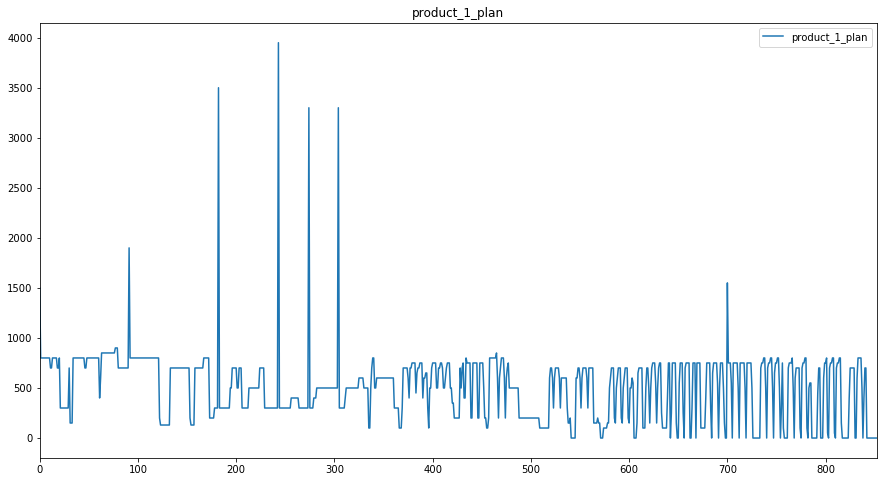

<Figure size 720x432 with 0 Axes>

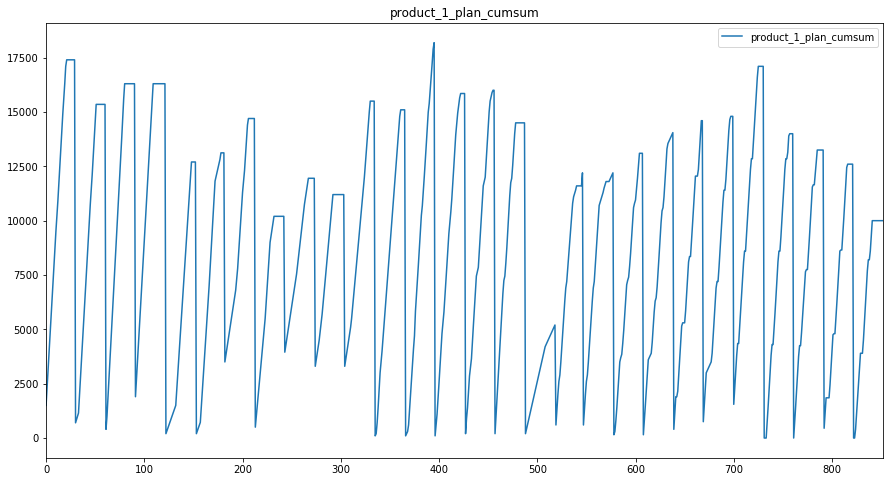

<Figure size 720x432 with 0 Axes>

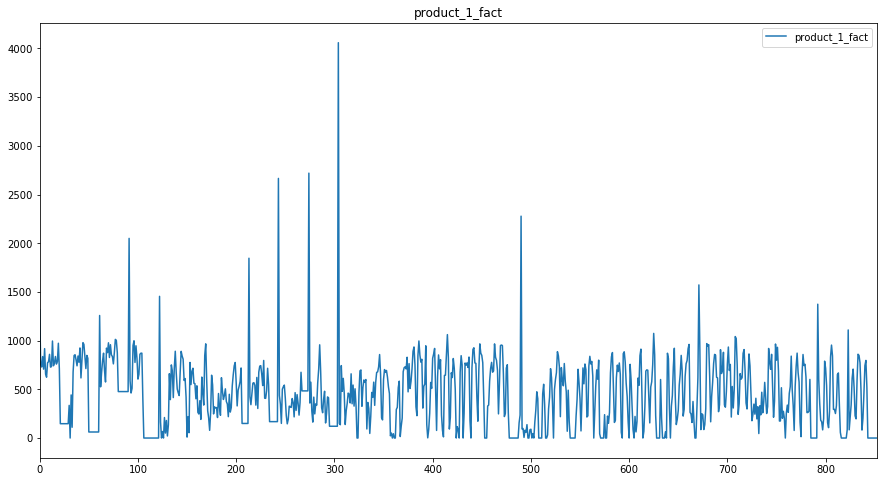

<Figure size 720x432 with 0 Axes>

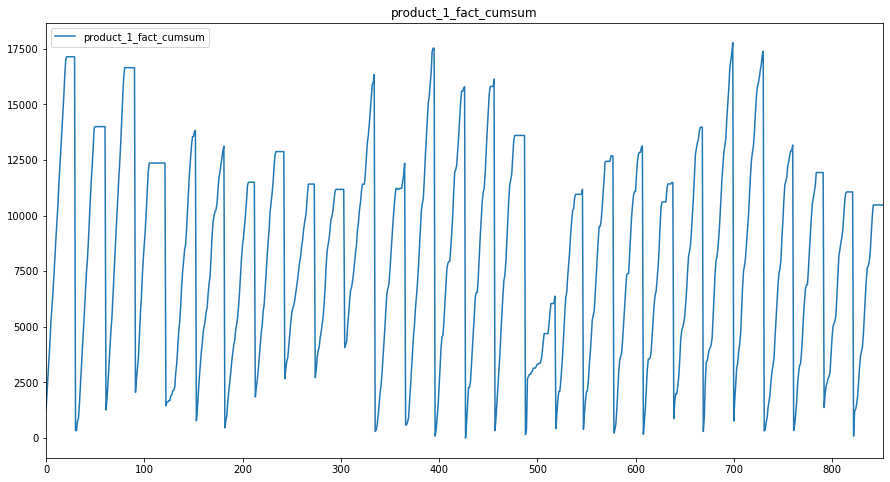

<Figure size 720x432 with 0 Axes>

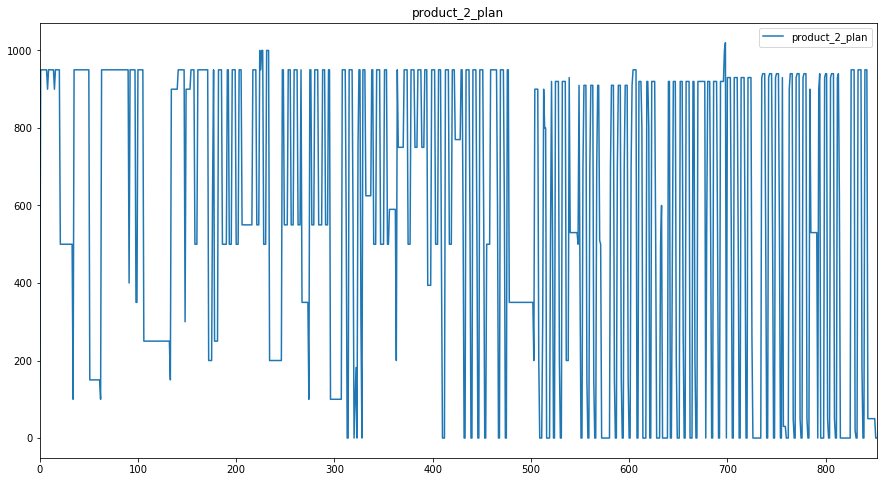

<Figure size 720x432 with 0 Axes>

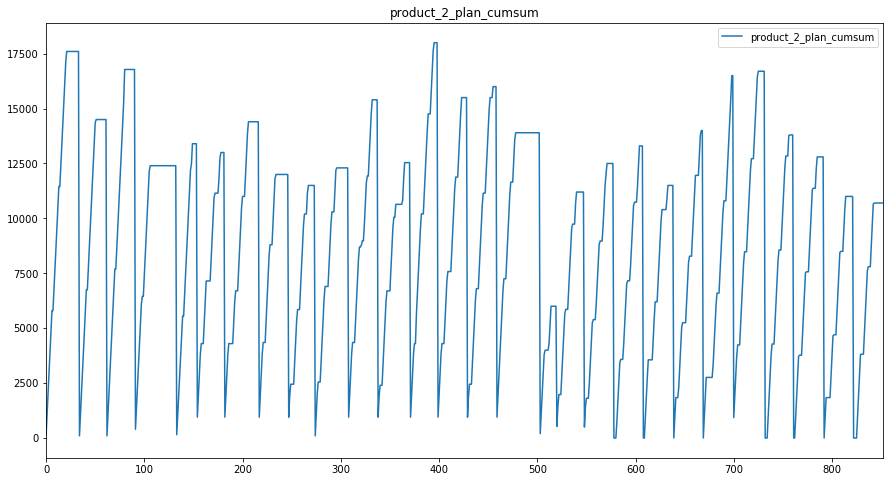

<Figure size 720x432 with 0 Axes>

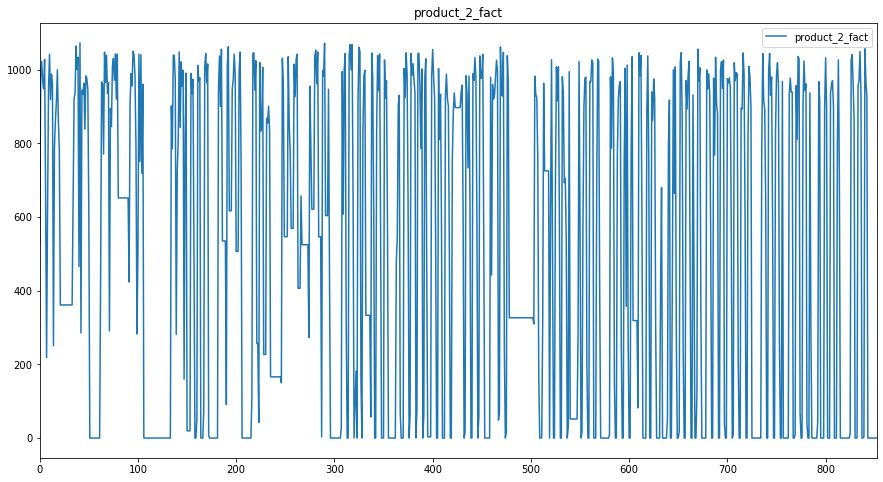

<Figure size 720x432 with 0 Axes>

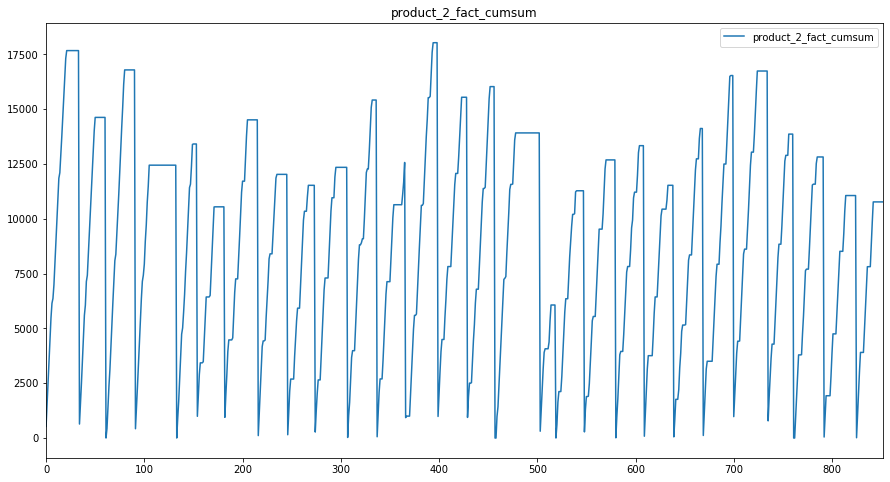

<Figure size 720x432 with 0 Axes>

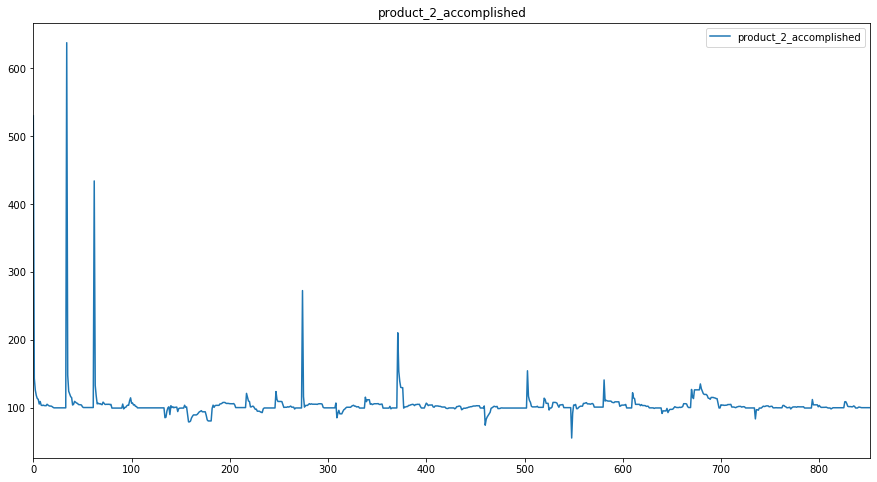

<Figure size 720x432 with 0 Axes>

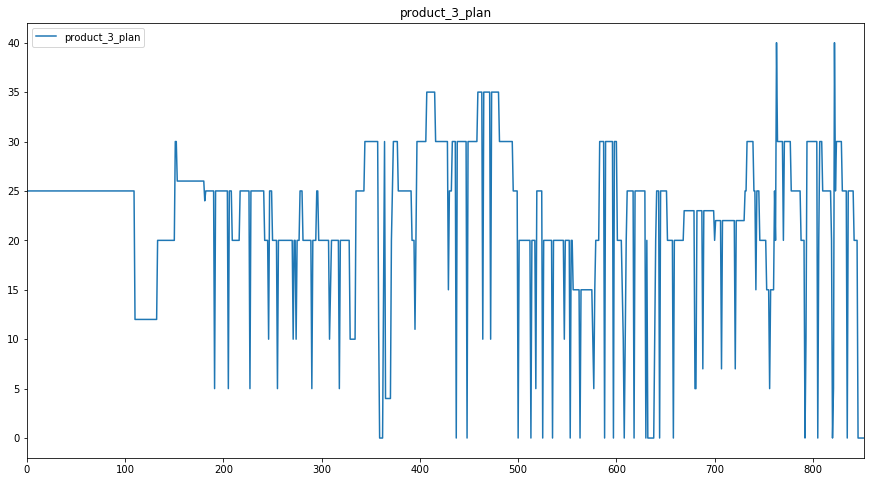

<Figure size 720x432 with 0 Axes>

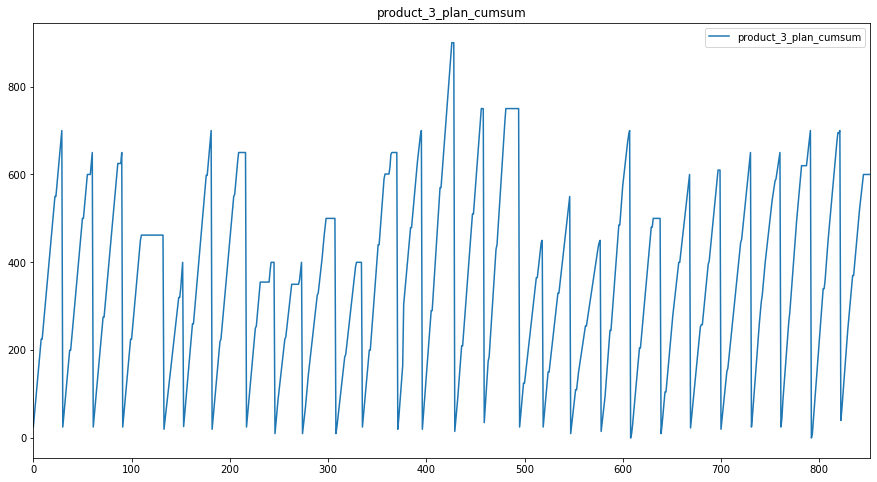

<Figure size 720x432 with 0 Axes>

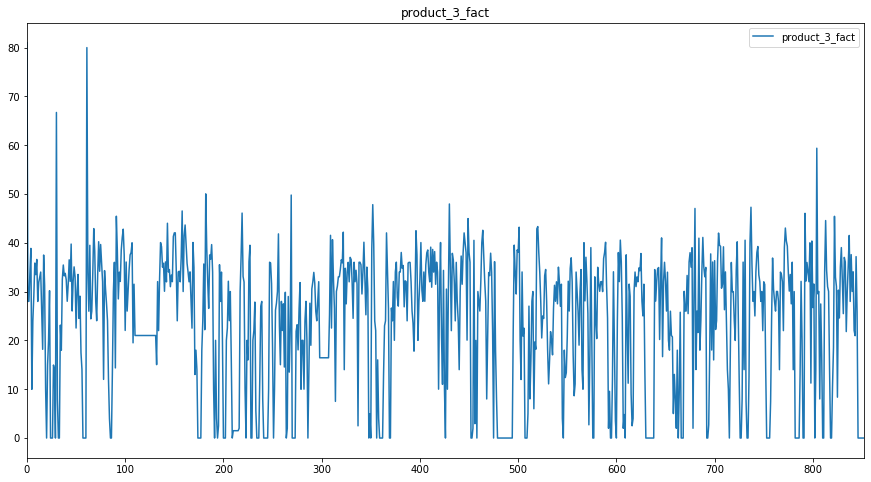

<Figure size 720x432 with 0 Axes>

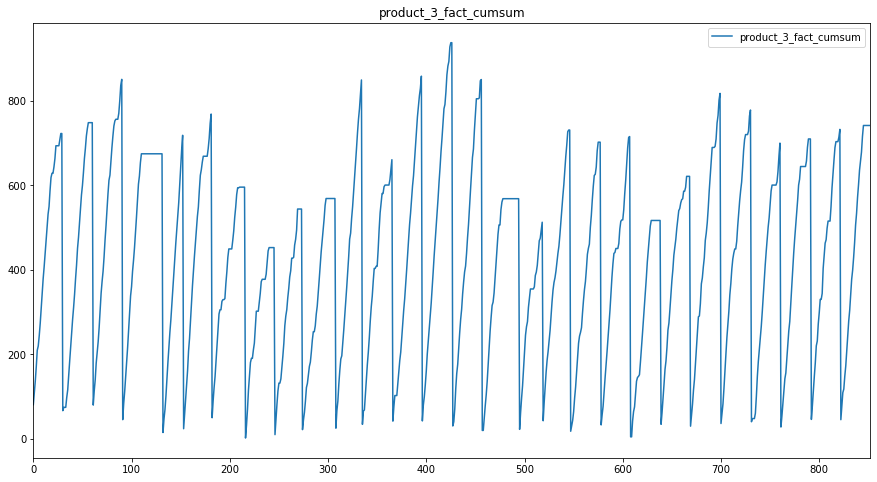

<Figure size 720x432 with 0 Axes>

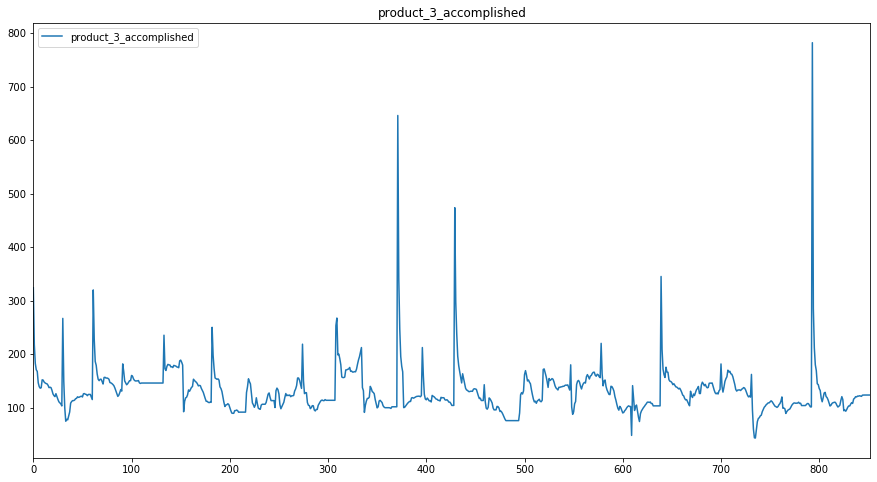

<Figure size 720x432 with 0 Axes>

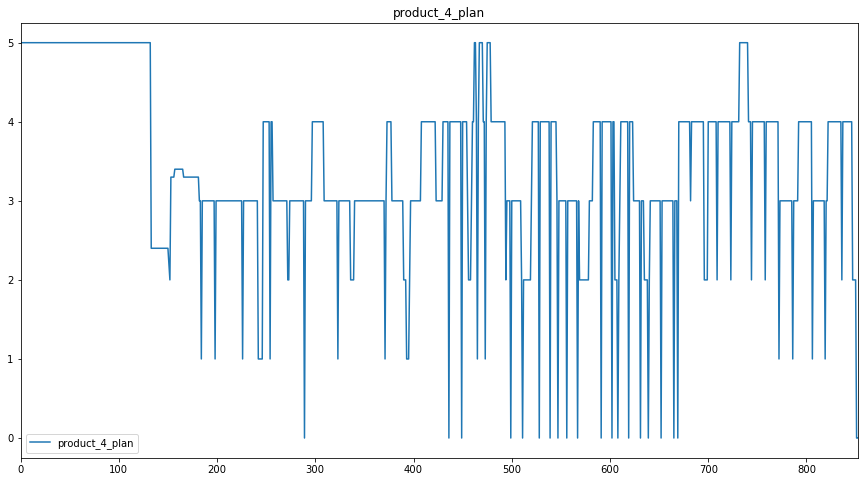

<Figure size 720x432 with 0 Axes>

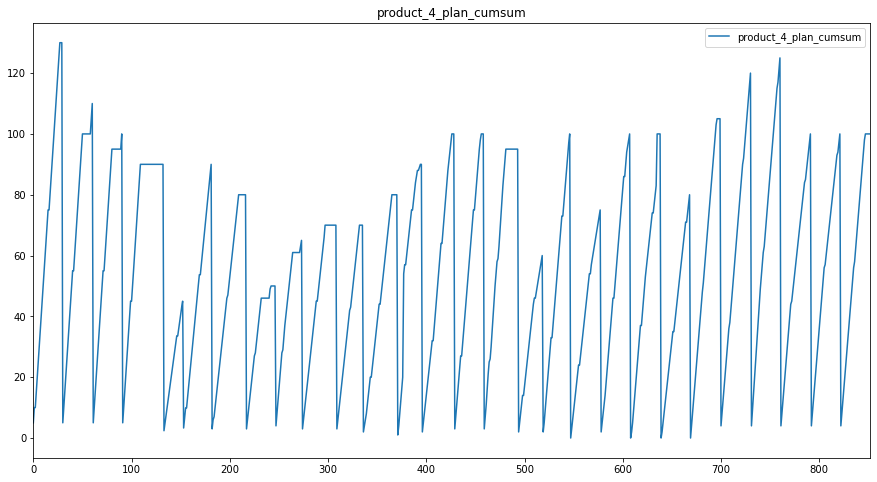

<Figure size 720x432 with 0 Axes>

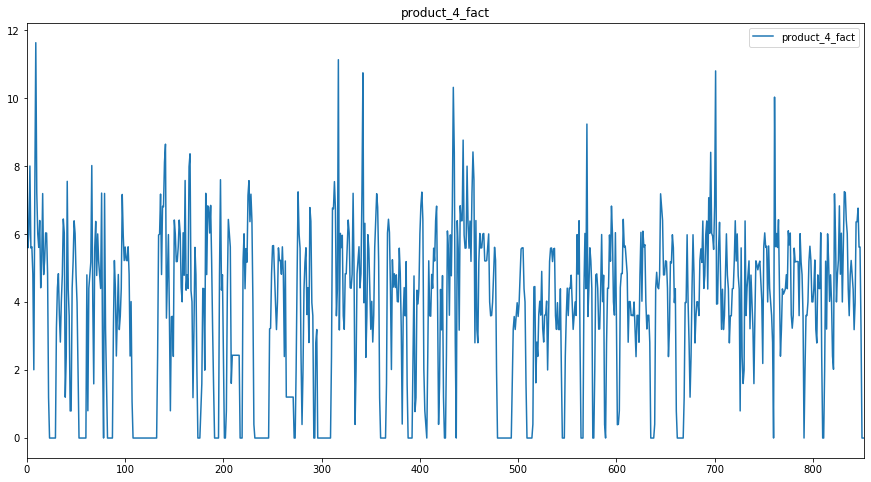

<Figure size 720x432 with 0 Axes>

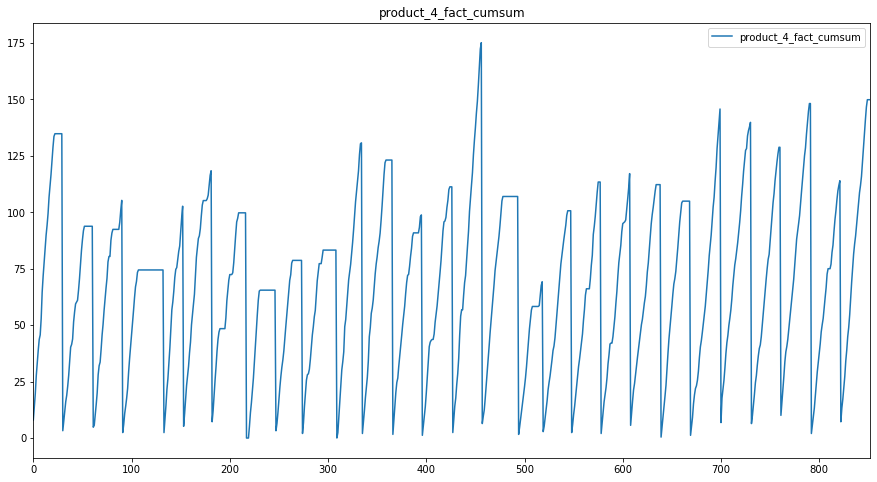

<Figure size 720x432 with 0 Axes>

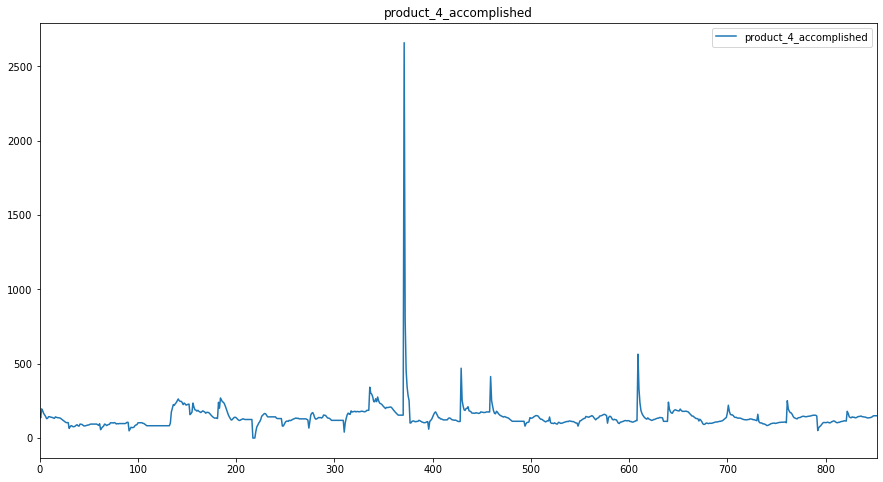

In [370]:
import matplotlib.pyplot as plt

for col in df_days.columns[1:20]:
    plt.figure(figsize=(10,6))
    
    df_days[[col]].plot(figsize=(15,8), title = col)
    
    #df_plans[[col, 'Дата']].sort_values(by='Дата').groupby('Дата').mean().plot(figsize=(15,8), title = col)
    #df[col].plot(title = col)
    plt.show()


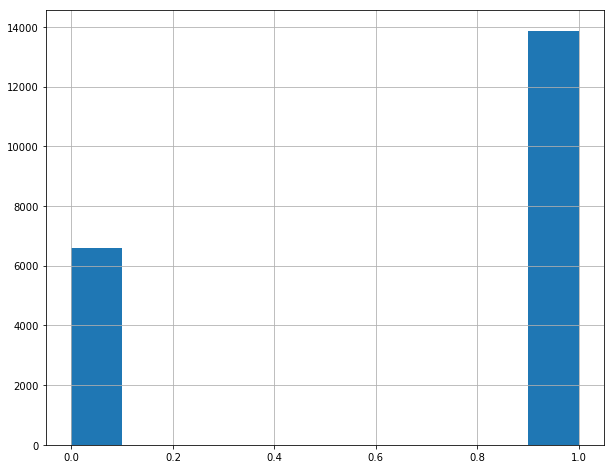

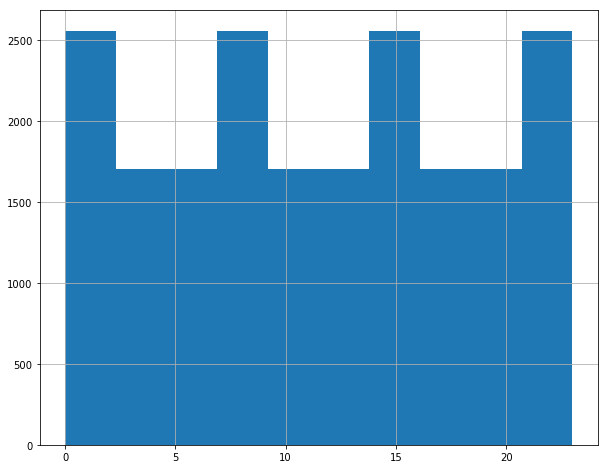

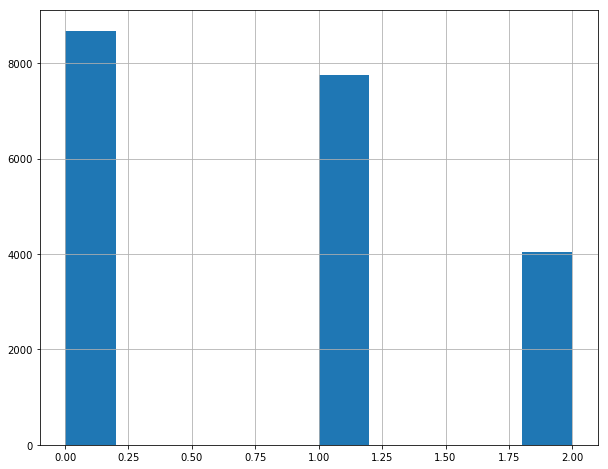

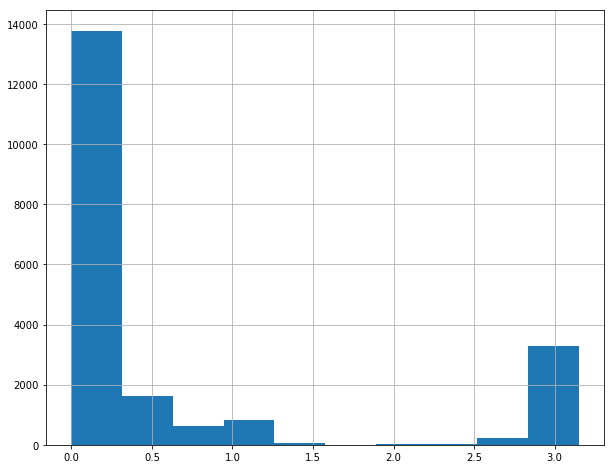

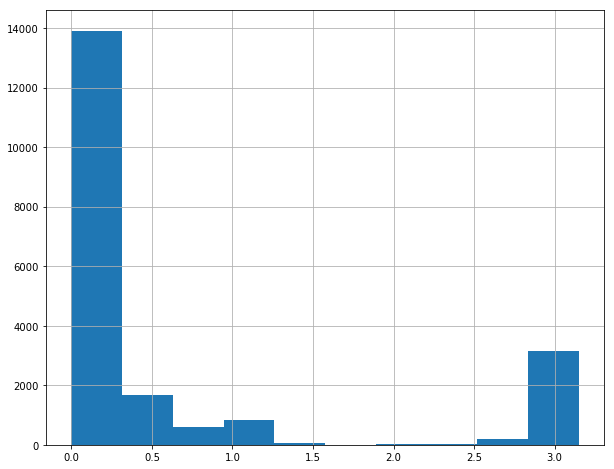

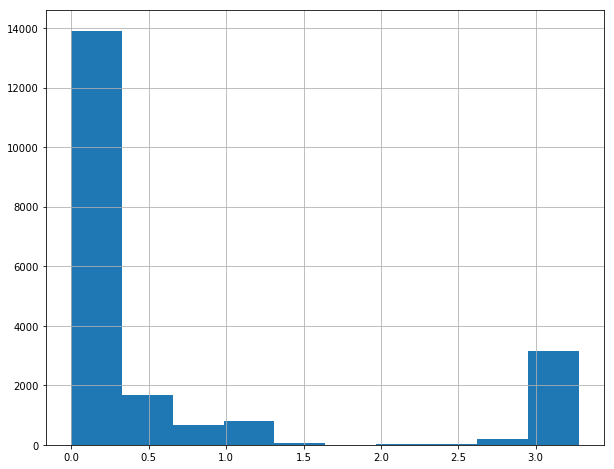

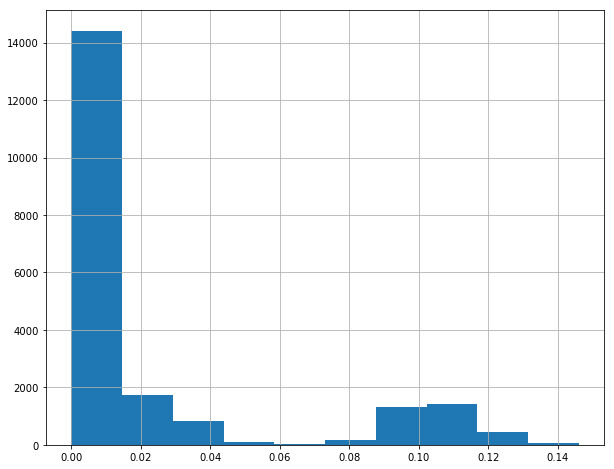

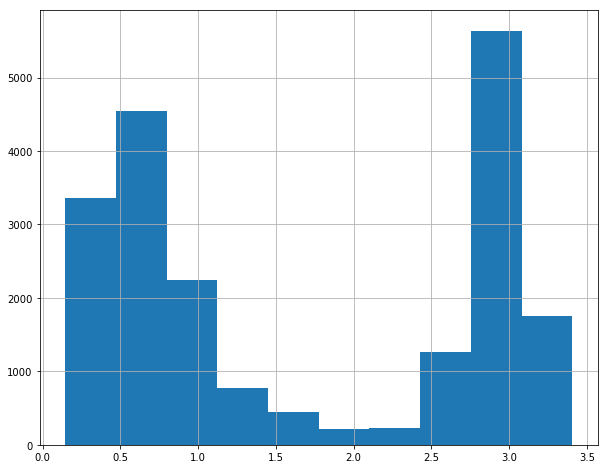

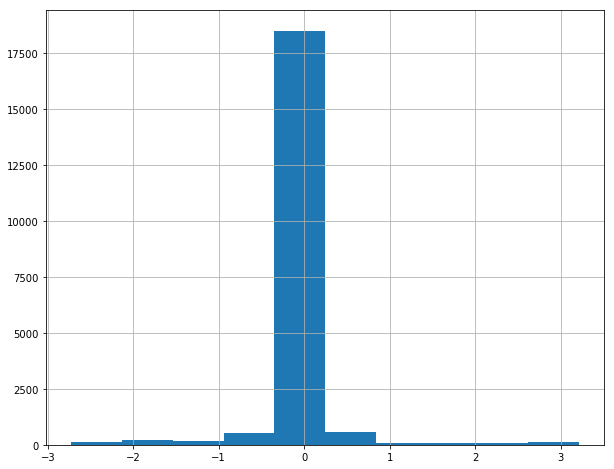

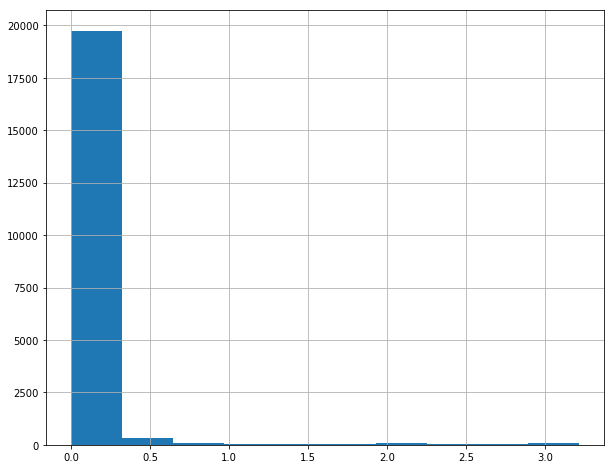

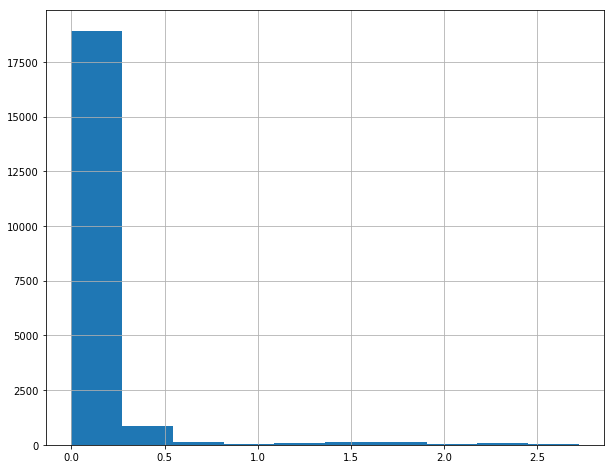

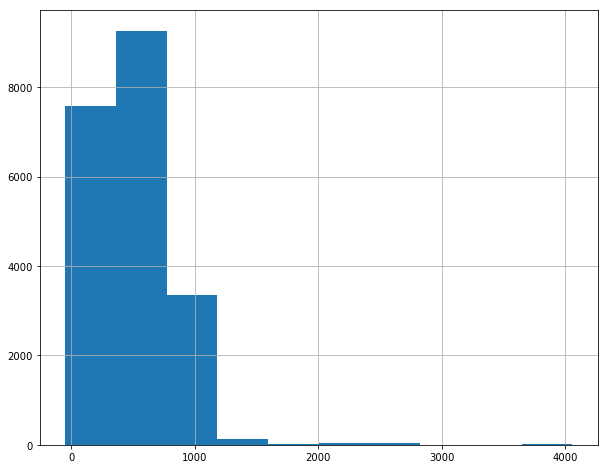

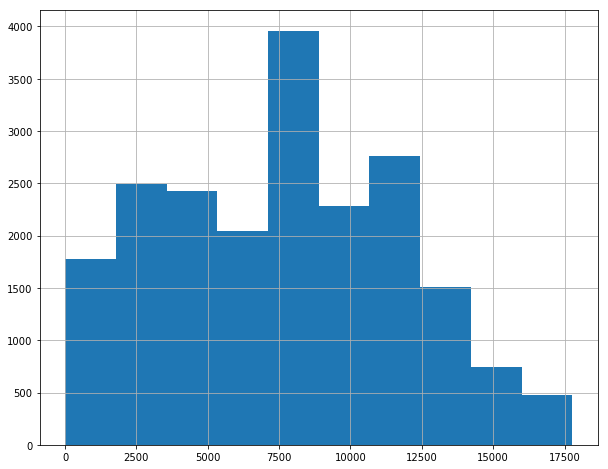

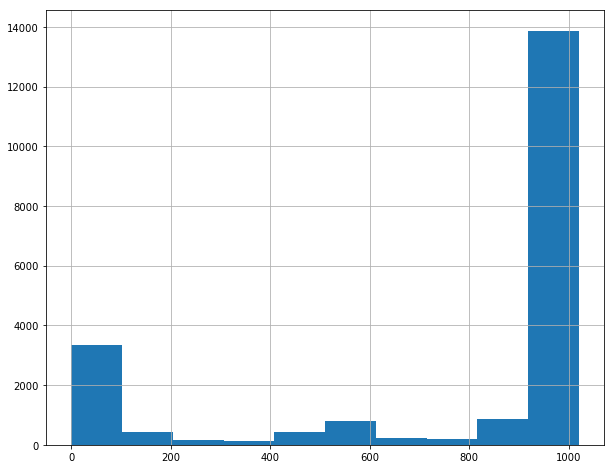

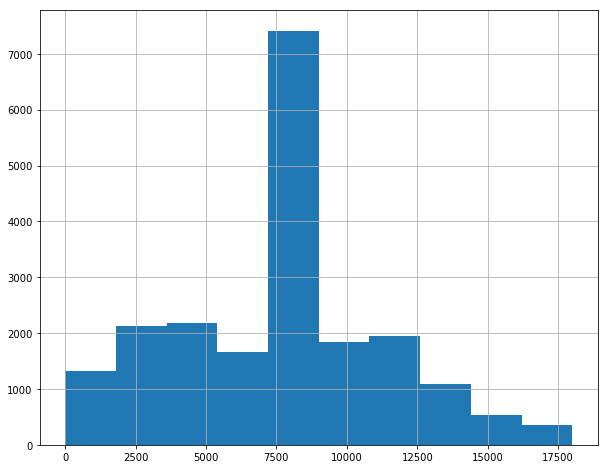

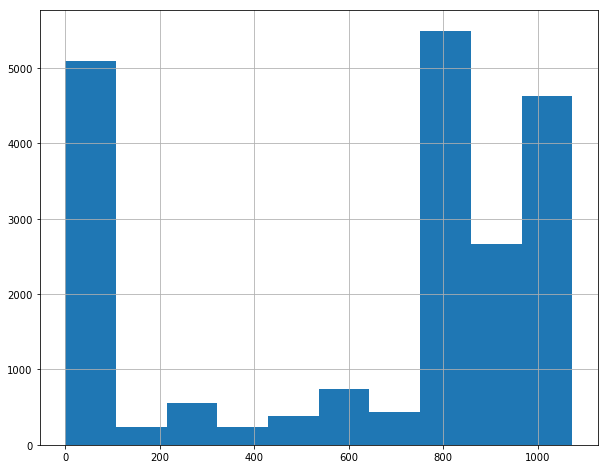

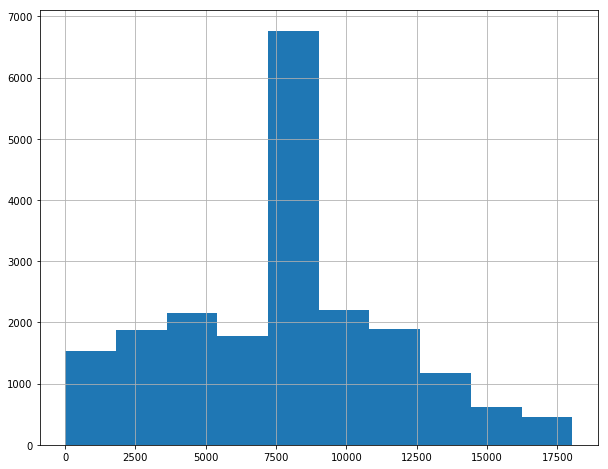

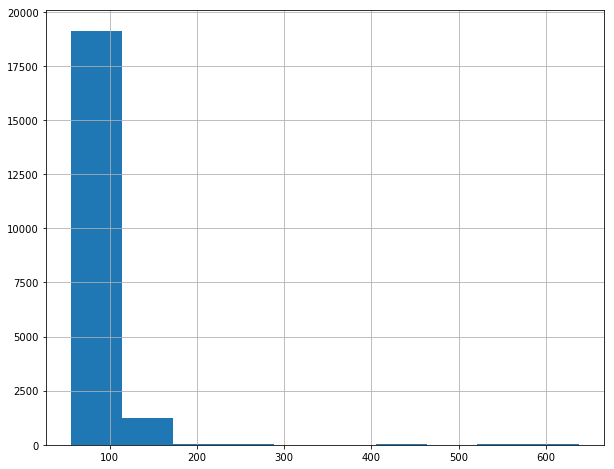

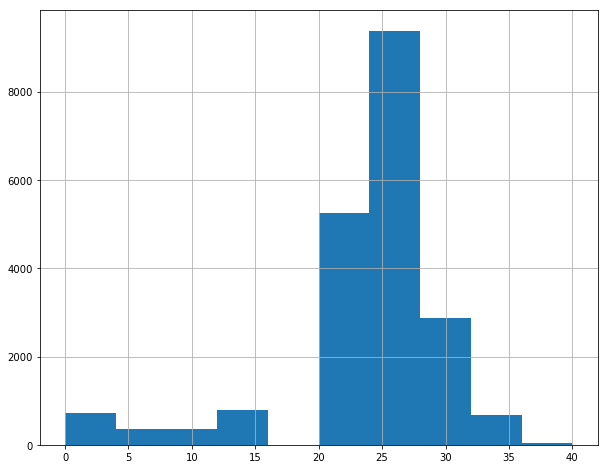

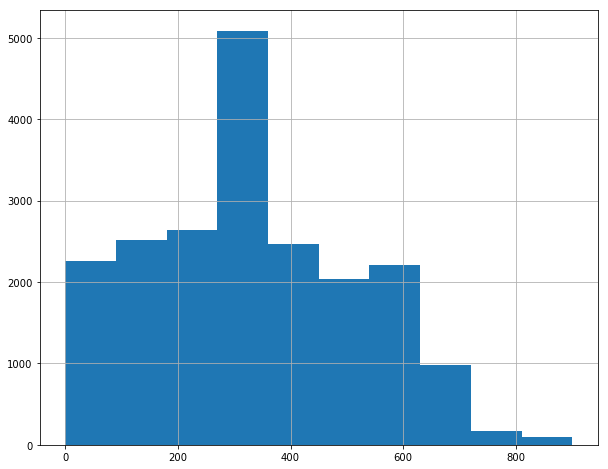

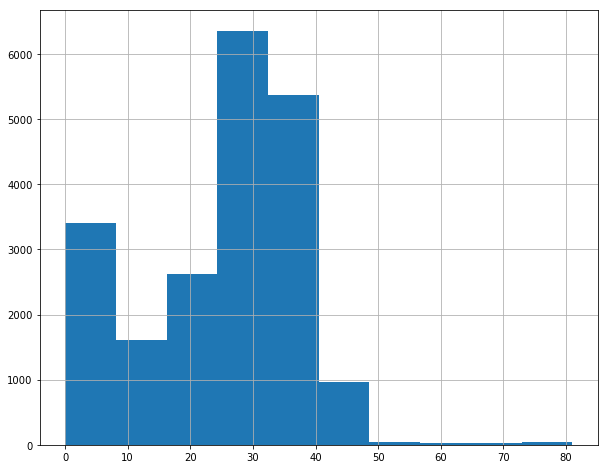

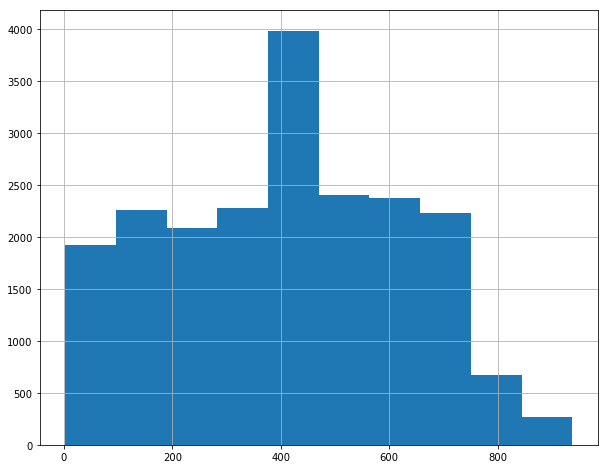

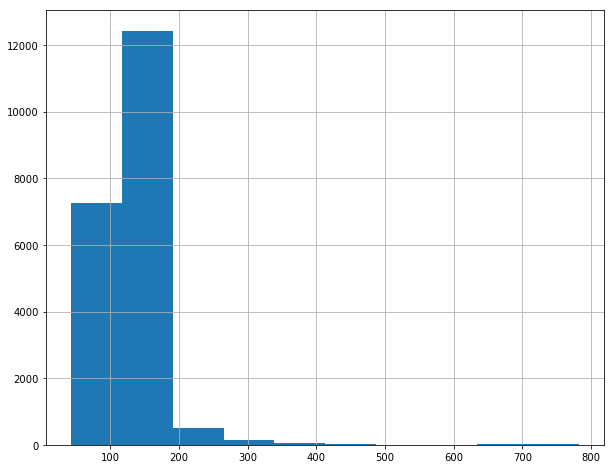

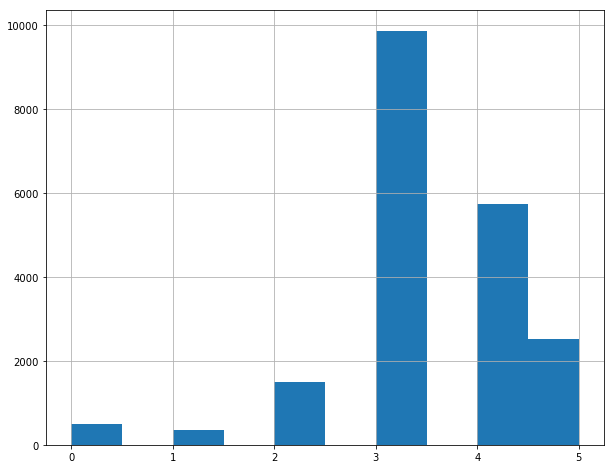

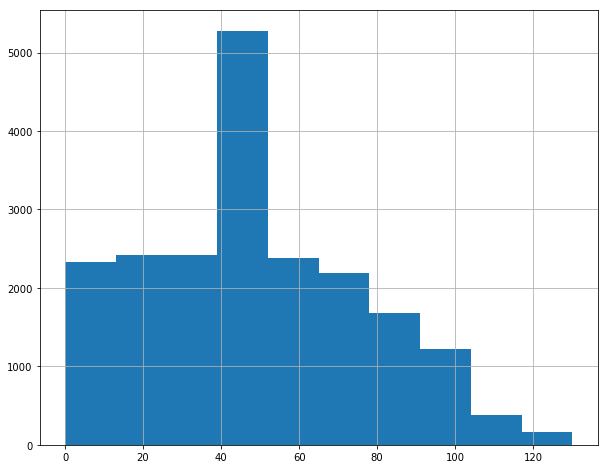

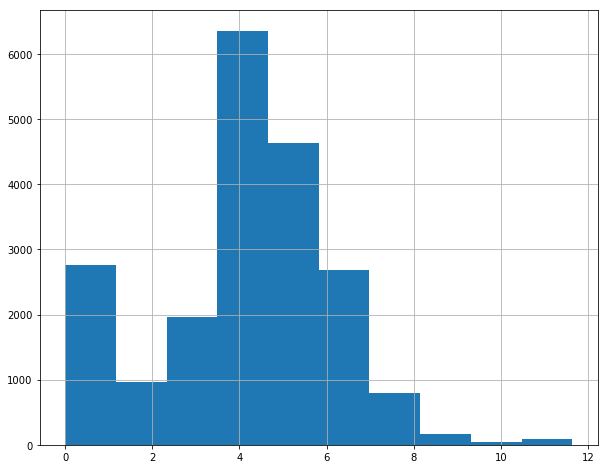

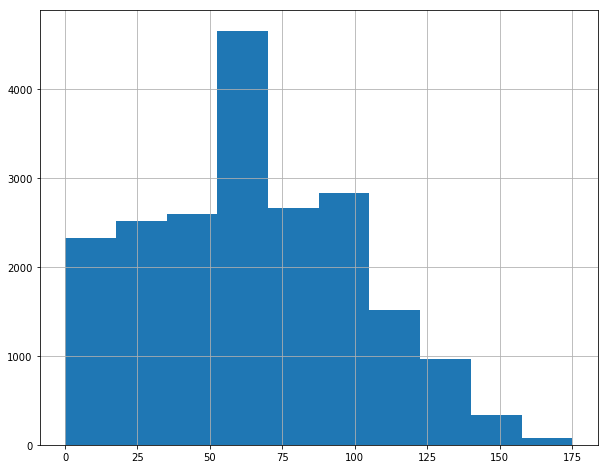

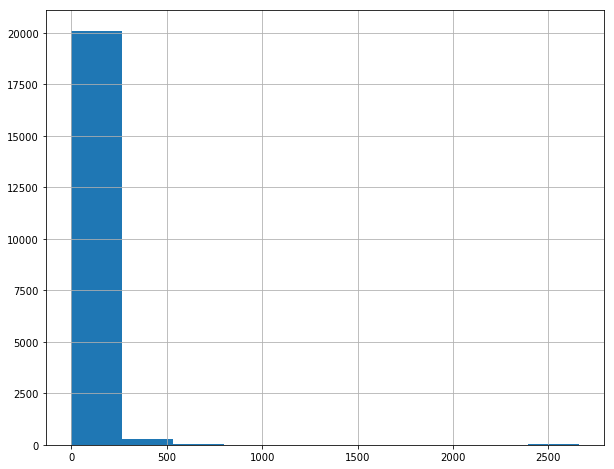

In [122]:
for col in df.columns[1:]:
    df[col].hist(figsize=(10,8))
    plt.show()


# Построение модели (days)

In [466]:
df_days = df_days_data.copy()

In [310]:
#df.corr()

In [467]:
with pd.option_context('display.max_columns', None):
    display(df_days)

,DateTime,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,product_3_plan,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_plan,product_4_plan_cumsum,product_4_fact,product_4_fact_cumsum,product_4_accomplished,product_2_Отключение газа,product_2_Резерв,product_2_Ремонт,product_2_ТО,product_2_резерв,product_2_ремонт,product_2_nan,product_3_Резерв,product_3_Ремонт,product_3_ТО,product_3_резерв,product_3_ремонт,product_3_nan,product_4_Ремонт,product_4_ТО,product_4_резерв,product_4_ремонт,product_4_nan,month,Характерный день,target_mean
0,2015-09-01,1500.0,1500.0,1317.735,1317.735,100.0,100.0,530.009,530.009,530.009000,25.0,25.0,81.011,81.011,324.044000,5.0,5.0,7.997,7.997,159.940,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,1.0,0.462083
1,2015-09-02,800.0,2300.0,755.753,2073.488,950.0,1050.0,979.918,1509.927,143.802571,25.0,50.0,28.002,109.013,218.026000,5.0,10.0,5.600,13.597,135.970,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,0.0,1.104167
2,2015-09-03,800.0,3100.0,729.503,2802.991,950.0,2000.0,1022.824,2532.751,126.637550,25.0,75.0,28.018,137.031,182.708000,5.0,10.0,6.004,19.601,196.010,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,9,1.0,0.850500
3,2015-09-04,800.0,3900.0,836.252,3639.243,950.0,2950.0,969.786,3502.537,118.730068,25.0,100.0,33.785,170.816,170.816000,5.0,15.0,8.008,27.609,184.060,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,0.0,1.538583
4,2015-09-05,800.0,4700.0,707.373,4346.616,950.0,3900.0,948.310,4450.847,114.124282,25.0,125.0,38.857,209.673,167.738400,5.0,20.0,5.596,33.205,166.025,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,1.0,2.764208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2017-12-27,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,5.625,146.621,146.621,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,12,0.0,0.443208
849,2017-12-28,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,3.233,149.854,149.854,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,12,0.0,0.356333
850,2017-12-29,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,0.000,149.854,149.854,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,12,0.0,0.351167
851,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,12,1.0,0.234583


In [468]:
df_days['pkt_change'] = df_days.target_mean.pct_change()

In [469]:
df_days['MA_3'] = df_days.target_mean.rolling(3).mean()

In [470]:
df_days['MA_7'] = df_days.target_mean.rolling(7).mean()

In [471]:
for col in ['target_mean', 'product_1_plan', 'product_1_plan_cumsum', 'product_2_plan', 'product_2_plan_cumsum', 'product_3_plan', 'product_3_plan_cumsum', 'product_4_plan','product_4_plan_cumsum']:
    df_days[col] = df_days[col].shift(periods=-1) #'product_2_plan_cumsum' 'product_4_plan'

In [472]:
df_days = df_days.dropna()

In [410]:
X = df_days.drop(['target_mean', 'DateTime',
                 'product_2_Резерв', 'Характерный день', 'product_4_nan',
                  'product_4_ремонт', 'product_4_резерв', 'product_2_ремонт',
                  'product_2_nan', 'product_3_nan', 'product_3_ремонт',
                  'product_3_Резерв', 'product_3_Ремонт', 'product_2_Ремонт',
                  'product_3_резерв', 'product_4_Ремонт', 'product_2_Отключение газа'], axis=1)
Y = df_days['target_mean']

In [414]:
with pd.option_context('display.max_columns', None):
    display(X)

,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,product_3_plan,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_plan,product_4_plan_cumsum,product_4_fact,product_4_fact_cumsum,product_4_accomplished,product_2_ТО,product_2_резерв,product_3_ТО,product_4_ТО,month,pkt_change,MA_3,MA_7
6,800.0,7100.0,655.914,5920.395,950.0,5800.0,666.870,6145.959,105.964810,25.0,200.0,24.027,243.686,139.249143,5.0,35.0,4.827,43.664,145.546667,0,0,0,0,9,-0.427775,2.429014,1.606054
7,800.0,7900.0,624.445,6544.840,900.0,6700.0,218.012,6363.971,109.723638,25.0,225.0,29.159,272.845,136.422500,5.0,40.0,2.010,45.674,130.497143,1,0,0,0,9,0.760169,2.473431,1.953964
8,800.0,8700.0,772.839,7317.679,950.0,7650.0,621.966,6985.937,104.267716,25.0,225.0,35.852,308.697,137.198667,5.0,45.0,7.234,52.908,132.270000,0,0,0,0,9,-0.110183,2.373931,2.164542
9,800.0,9500.0,783.485,8101.164,950.0,8600.0,952.594,7938.531,103.771647,25.0,250.0,33.478,342.175,152.077778,5.0,50.0,11.640,64.548,143.440000,0,0,1,0,9,0.123471,2.790736,2.456833
10,700.0,10200.0,859.052,8960.216,950.0,9550.0,1042.512,8981.043,104.430733,25.0,275.0,36.602,378.777,151.510800,5.0,55.0,7.224,71.772,143.544000,0,0,0,0,9,0.002201,2.792556,2.651738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,5.621,140.996,140.996000,0,0,0,1,12,-0.019732,0.563181,1.235935
848,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,5.625,146.621,146.621000,0,0,0,0,12,-0.150331,0.498986,0.903869
849,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,3.233,149.854,149.854000,0,0,0,0,12,-0.196014,0.440389,0.617369
850,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854000,0,0,0,0,12,-0.014500,0.383569,0.514446


In [426]:
Y

6      2.897458
7      2.578208
8      2.896542
9      2.902917
10     1.574042
         ...   
847    0.443208
848    0.356333
849    0.351167
850    0.234583
851    0.181125
Name: target_mean, Length: 846, dtype: float64

In [411]:
X.shape

(846, 27)

In [401]:
from sklearn.model_selection import TimeSeriesSplit

#tscv = TimeSeriesSplit(max_train_size= None, n_splits=10)

tscv = TimeSeriesSplit(max_train_size=None, n_splits=845)
print(tscv)


TimeSeriesSplit(max_train_size=None, n_splits=845)


In [412]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

import time

y_pred_test = []

start_time = time.time()

#GB_regr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6) time:  6220
GB_regr = GradientBoostingRegressor()

for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    print("TRAIN:", X_train.shape, "TEST:", X_test.shape)
    
    GB_regr.fit(X_train, y_train)
    y_pred_test += list(GB_regr.predict(X_test))

print('time: ', time.time() - start_time)  

TRAIN: (1, 27) TEST: (1, 27)
TRAIN: (2, 27) TEST: (1, 27)
TRAIN: (3, 27) TEST: (1, 27)
TRAIN: (4, 27) TEST: (1, 27)
TRAIN: (5, 27) TEST: (1, 27)
TRAIN: (6, 27) TEST: (1, 27)
TRAIN: (7, 27) TEST: (1, 27)
TRAIN: (8, 27) TEST: (1, 27)
TRAIN: (9, 27) TEST: (1, 27)
TRAIN: (10, 27) TEST: (1, 27)
TRAIN: (11, 27) TEST: (1, 27)
TRAIN: (12, 27) TEST: (1, 27)
TRAIN: (13, 27) TEST: (1, 27)
TRAIN: (14, 27) TEST: (1, 27)
TRAIN: (15, 27) TEST: (1, 27)
TRAIN: (16, 27) TEST: (1, 27)
TRAIN: (17, 27) TEST: (1, 27)
TRAIN: (18, 27) TEST: (1, 27)
TRAIN: (19, 27) TEST: (1, 27)
TRAIN: (20, 27) TEST: (1, 27)
TRAIN: (21, 27) TEST: (1, 27)
TRAIN: (22, 27) TEST: (1, 27)
TRAIN: (23, 27) TEST: (1, 27)
TRAIN: (24, 27) TEST: (1, 27)
TRAIN: (25, 27) TEST: (1, 27)
TRAIN: (26, 27) TEST: (1, 27)
TRAIN: (27, 27) TEST: (1, 27)
TRAIN: (28, 27) TEST: (1, 27)
TRAIN: (29, 27) TEST: (1, 27)
TRAIN: (30, 27) TEST: (1, 27)
TRAIN: (31, 27) TEST: (1, 27)
TRAIN: (32, 27) TEST: (1, 27)
TRAIN: (33, 27) TEST: (1, 27)
TRAIN: (34, 27) TES

TRAIN: (273, 27) TEST: (1, 27)
TRAIN: (274, 27) TEST: (1, 27)
TRAIN: (275, 27) TEST: (1, 27)
TRAIN: (276, 27) TEST: (1, 27)
TRAIN: (277, 27) TEST: (1, 27)
TRAIN: (278, 27) TEST: (1, 27)
TRAIN: (279, 27) TEST: (1, 27)
TRAIN: (280, 27) TEST: (1, 27)
TRAIN: (281, 27) TEST: (1, 27)
TRAIN: (282, 27) TEST: (1, 27)
TRAIN: (283, 27) TEST: (1, 27)
TRAIN: (284, 27) TEST: (1, 27)
TRAIN: (285, 27) TEST: (1, 27)
TRAIN: (286, 27) TEST: (1, 27)
TRAIN: (287, 27) TEST: (1, 27)
TRAIN: (288, 27) TEST: (1, 27)
TRAIN: (289, 27) TEST: (1, 27)
TRAIN: (290, 27) TEST: (1, 27)
TRAIN: (291, 27) TEST: (1, 27)
TRAIN: (292, 27) TEST: (1, 27)
TRAIN: (293, 27) TEST: (1, 27)
TRAIN: (294, 27) TEST: (1, 27)
TRAIN: (295, 27) TEST: (1, 27)
TRAIN: (296, 27) TEST: (1, 27)
TRAIN: (297, 27) TEST: (1, 27)
TRAIN: (298, 27) TEST: (1, 27)
TRAIN: (299, 27) TEST: (1, 27)
TRAIN: (300, 27) TEST: (1, 27)
TRAIN: (301, 27) TEST: (1, 27)
TRAIN: (302, 27) TEST: (1, 27)
TRAIN: (303, 27) TEST: (1, 27)
TRAIN: (304, 27) TEST: (1, 27)
TRAIN: (

TRAIN: (539, 27) TEST: (1, 27)
TRAIN: (540, 27) TEST: (1, 27)
TRAIN: (541, 27) TEST: (1, 27)
TRAIN: (542, 27) TEST: (1, 27)
TRAIN: (543, 27) TEST: (1, 27)
TRAIN: (544, 27) TEST: (1, 27)
TRAIN: (545, 27) TEST: (1, 27)
TRAIN: (546, 27) TEST: (1, 27)
TRAIN: (547, 27) TEST: (1, 27)
TRAIN: (548, 27) TEST: (1, 27)
TRAIN: (549, 27) TEST: (1, 27)
TRAIN: (550, 27) TEST: (1, 27)
TRAIN: (551, 27) TEST: (1, 27)
TRAIN: (552, 27) TEST: (1, 27)
TRAIN: (553, 27) TEST: (1, 27)
TRAIN: (554, 27) TEST: (1, 27)
TRAIN: (555, 27) TEST: (1, 27)
TRAIN: (556, 27) TEST: (1, 27)
TRAIN: (557, 27) TEST: (1, 27)
TRAIN: (558, 27) TEST: (1, 27)
TRAIN: (559, 27) TEST: (1, 27)
TRAIN: (560, 27) TEST: (1, 27)
TRAIN: (561, 27) TEST: (1, 27)
TRAIN: (562, 27) TEST: (1, 27)
TRAIN: (563, 27) TEST: (1, 27)
TRAIN: (564, 27) TEST: (1, 27)
TRAIN: (565, 27) TEST: (1, 27)
TRAIN: (566, 27) TEST: (1, 27)
TRAIN: (567, 27) TEST: (1, 27)
TRAIN: (568, 27) TEST: (1, 27)
TRAIN: (569, 27) TEST: (1, 27)
TRAIN: (570, 27) TEST: (1, 27)
TRAIN: (

TRAIN: (806, 27) TEST: (1, 27)
TRAIN: (807, 27) TEST: (1, 27)
TRAIN: (808, 27) TEST: (1, 27)
TRAIN: (809, 27) TEST: (1, 27)
TRAIN: (810, 27) TEST: (1, 27)
TRAIN: (811, 27) TEST: (1, 27)
TRAIN: (812, 27) TEST: (1, 27)
TRAIN: (813, 27) TEST: (1, 27)
TRAIN: (814, 27) TEST: (1, 27)
TRAIN: (815, 27) TEST: (1, 27)
TRAIN: (816, 27) TEST: (1, 27)
TRAIN: (817, 27) TEST: (1, 27)
TRAIN: (818, 27) TEST: (1, 27)
TRAIN: (819, 27) TEST: (1, 27)
TRAIN: (820, 27) TEST: (1, 27)
TRAIN: (821, 27) TEST: (1, 27)
TRAIN: (822, 27) TEST: (1, 27)
TRAIN: (823, 27) TEST: (1, 27)
TRAIN: (824, 27) TEST: (1, 27)
TRAIN: (825, 27) TEST: (1, 27)
TRAIN: (826, 27) TEST: (1, 27)
TRAIN: (827, 27) TEST: (1, 27)
TRAIN: (828, 27) TEST: (1, 27)
TRAIN: (829, 27) TEST: (1, 27)
TRAIN: (830, 27) TEST: (1, 27)
TRAIN: (831, 27) TEST: (1, 27)
TRAIN: (832, 27) TEST: (1, 27)
TRAIN: (833, 27) TEST: (1, 27)
TRAIN: (834, 27) TEST: (1, 27)
TRAIN: (835, 27) TEST: (1, 27)
TRAIN: (836, 27) TEST: (1, 27)
TRAIN: (837, 27) TEST: (1, 27)
TRAIN: (

In [333]:
mean_absolute_error(Y.iloc[1:], y_pred_test)

0.6488196418471024

In [403]:
mean_absolute_error(Y.iloc[1:], y_pred_test)

0.5833982438058746

In [413]:
mean_absolute_error(Y.iloc[1:], y_pred_test)

0.5800864113992871

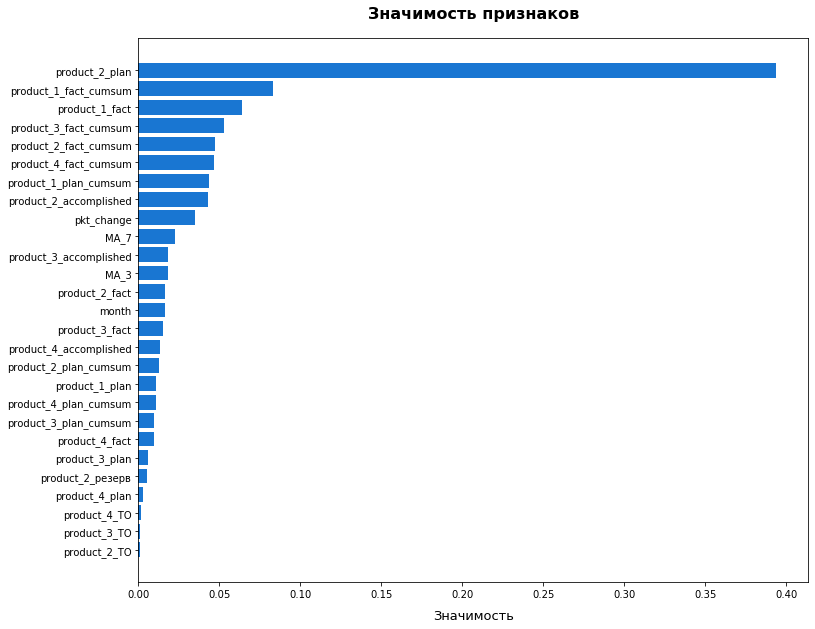

In [415]:
import matplotlib.pyplot as plt

dset = pd.concat([pd.Series(X.columns), pd.Series(GB_regr.feature_importances_)], axis=1).rename(columns={0:'feature', 1:'imp'})\
    .set_index('feature')

dset = dset.sort_values(by='imp', ascending=True)
plt.figure(figsize=(12, 10))
plt.barh(y=dset.index, width=dset['imp'], color='#1976D2')
plt.title('Значимость признаков', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Значимость', fontsize=13, labelpad=10)
plt.show()

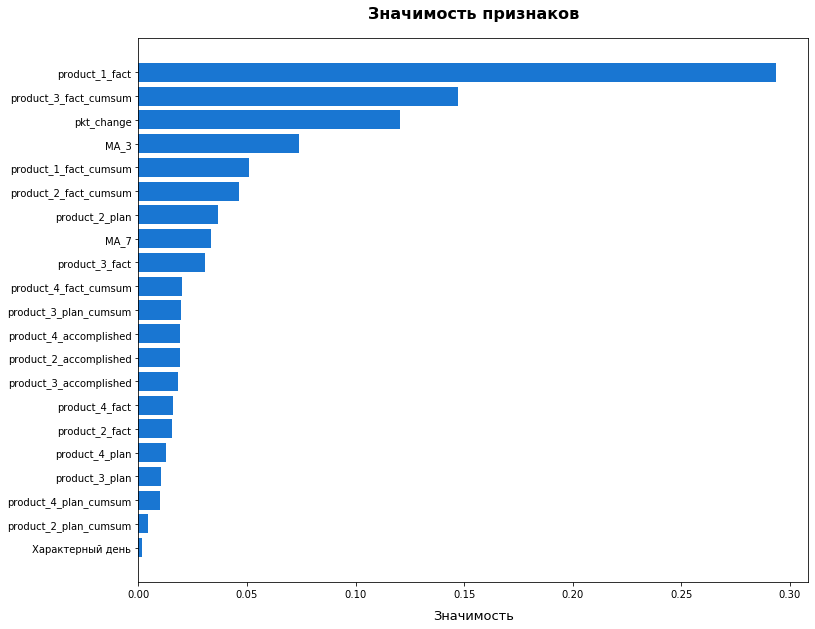

In [334]:
import matplotlib.pyplot as plt

dset = pd.concat([pd.Series(X.columns), pd.Series(GB_regr.feature_importances_)], axis=1).rename(columns={0:'feature', 1:'imp'})\
    .set_index('feature')

dset = dset.sort_values(by='imp', ascending=True)
plt.figure(figsize=(12, 10))
plt.barh(y=dset.index, width=dset['imp'], color='#1976D2')
plt.title('Значимость признаков', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Значимость', fontsize=13, labelpad=10)
plt.show()

# Обработка hours

In [417]:
df_hours = df_hours.drop('Характерный день', axis=1)

In [473]:
df_days

,DateTime,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,...,product_4_ТО,product_4_резерв,product_4_ремонт,product_4_nan,month,Характерный день,target_mean,pkt_change,MA_3,MA_7
6,2015-09-07,800.0,7100.0,655.914,5920.395,950.0,5800.0,666.870,6145.959,105.964810,...,0,0,0,1,9,0.0,2.897458,-0.427775,2.429014,1.606054
7,2015-09-08,800.0,7900.0,624.445,6544.840,900.0,6700.0,218.012,6363.971,109.723638,...,0,0,0,1,9,1.0,2.578208,0.760169,2.473431,1.953964
8,2015-09-09,800.0,8700.0,772.839,7317.679,950.0,7650.0,621.966,6985.937,104.267716,...,0,0,0,1,9,0.0,2.896542,-0.110183,2.373931,2.164542
9,2015-09-10,800.0,9500.0,783.485,8101.164,950.0,8600.0,952.594,7938.531,103.771647,...,0,0,0,1,9,0.0,2.902917,0.123471,2.790736,2.456833
10,2015-09-11,700.0,10200.0,859.052,8960.216,950.0,9550.0,1042.512,8981.043,104.430733,...,0,0,0,1,9,0.0,1.574042,0.002201,2.792556,2.651738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2017-12-26,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,...,1,0,0,0,12,0.0,0.443208,-0.019732,0.563181,1.235935
848,2017-12-27,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,...,0,1,0,0,12,0.0,0.356333,-0.150331,0.498986,0.903869
849,2017-12-28,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,...,0,1,0,0,12,0.0,0.351167,-0.196014,0.440389,0.617369
850,2017-12-29,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,...,0,1,0,0,12,0.0,0.234583,-0.014500,0.383569,0.514446


In [484]:
df2 = df_days.merge(df_hours_data.drop('Характерный день',axis=1), left_on='DateTime', right_on='Дата', how='inner')#[['Дата', 'Торговый час', 'Характерный час', 'target', 'target_mean']]

In [490]:
X = df2.drop(['DateTime', 'Дата', 'target'], axis=1)
Y = df2['target']

In [498]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(max_train_size= 4320, n_splits=845)
print(tscv)

TimeSeriesSplit(max_train_size=4320, n_splits=845)


In [482]:
#for train_index, test_index in tscv.split(X):
#    print("TRAIN:", len(train_index), "TEST:", len(test_index))

In [499]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import time

y_pred_test = []
start_time = time.time()

#GB_regr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6) time:  6220
GB_regr = GradientBoostingRegressor()

for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    print("TRAIN:", X_train.shape, "TEST:", X_test.shape)
    
    GB_regr.fit(X_train, y_train)
    y_pred_test += list(GB_regr.predict(X_test))


print('time: ', time.time() - start_time)  

TRAIN: (24, 45) TEST: (24, 45)
TRAIN: (48, 45) TEST: (24, 45)
TRAIN: (72, 45) TEST: (24, 45)
TRAIN: (96, 45) TEST: (24, 45)
TRAIN: (120, 45) TEST: (24, 45)
TRAIN: (144, 45) TEST: (24, 45)
TRAIN: (168, 45) TEST: (24, 45)
TRAIN: (192, 45) TEST: (24, 45)
TRAIN: (216, 45) TEST: (24, 45)
TRAIN: (240, 45) TEST: (24, 45)
TRAIN: (264, 45) TEST: (24, 45)
TRAIN: (288, 45) TEST: (24, 45)
TRAIN: (312, 45) TEST: (24, 45)
TRAIN: (336, 45) TEST: (24, 45)
TRAIN: (360, 45) TEST: (24, 45)
TRAIN: (384, 45) TEST: (24, 45)
TRAIN: (408, 45) TEST: (24, 45)
TRAIN: (432, 45) TEST: (24, 45)
TRAIN: (456, 45) TEST: (24, 45)
TRAIN: (480, 45) TEST: (24, 45)
TRAIN: (504, 45) TEST: (24, 45)
TRAIN: (528, 45) TEST: (24, 45)
TRAIN: (552, 45) TEST: (24, 45)
TRAIN: (576, 45) TEST: (24, 45)
TRAIN: (600, 45) TEST: (24, 45)
TRAIN: (624, 45) TEST: (24, 45)
TRAIN: (648, 45) TEST: (24, 45)
TRAIN: (672, 45) TEST: (24, 45)
TRAIN: (696, 45) TEST: (24, 45)
TRAIN: (720, 45) TEST: (24, 45)
TRAIN: (744, 45) TEST: (24, 45)
TRAIN: (768,

TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (43

TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (43

TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (4320, 45) TEST: (24, 45)
TRAIN: (43

In [494]:
mean_absolute_error(Y.iloc[24:], y_pred_test)  #720

0.5180753493406091

In [497]:
mean_absolute_error(Y.iloc[24:], y_pred_test) #2160

0.4077585403464614

In [504]:
mean_absolute_error(Y.iloc[24:], y_pred_test) #2160

0.37771558404421657

In [ ]:
grid_params= {'lambda_l1': 11,
  'lambda_l2': 40,
  'learning_rate': 0.01,
  'max_bin': 22,
  'max_depth': 7,
  'metric': 'AUC',
  'min_data_in_leaf': 63,
  'n_estimators': 100,
  'num_leaves': 134,
  'objective': 'binary'}

In [541]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(max_train_size= 8760, n_splits=845)
print(tscv)

TimeSeriesSplit(max_train_size=8760, n_splits=845)


In [534]:
rg_lgbm = lgbm.LGBMRegressor()

In [542]:
X = df2.drop(['DateTime', 'Дата', 'target'], axis=1)\
    .rename(columns={'Характерный день':'Character_day', 'Торговый час':'Trade_day', 'Характерный час':'Character_hour',               
                    'product_2_Резерв':'product_2_reserv', 'product_2_Ремонт':'product_2_repair', 
       'product_2_резерв':'product_22_reserv', 'product_2_ремонт':'product_22_repair', 
       'product_3_Резерв':'product_3_reserv', 'product_3_Ремонт':'product_3_repair',
       'product_3_резерв':'product_33_reserv', 'product_3_ремонт':'product_33_repair', 
       'product_4_Ремонт':'product_4_repair', 'product_4_резерв':'product_4_reserv', 'product_4_ремонт':'product_44_repair',
                    'product_2_Отключение газа':'Gaz_2_off', 'product_2_ТО':'product_2_TO',
                    'product_3_ТО':'product_3_TO', 'product_4_ТО':'product_4_TO'})

Y = df2['target']

In [530]:
X.columns

Index(['product_1_plan', 'product_1_plan_cumsum', 'product_1_fact',
       'product_1_fact_cumsum', 'product_2_plan', 'product_2_plan_cumsum',
       'product_2_fact', 'product_2_fact_cumsum', 'product_2_accomplished',
       'product_3_plan', 'product_3_plan_cumsum', 'product_3_fact',
       'product_3_fact_cumsum', 'product_3_accomplished', 'product_4_plan',
       'product_4_plan_cumsum', 'product_4_fact', 'product_4_fact_cumsum',
       'product_4_accomplished', 'Gaz_2_off', 'product_2_reserv',
       'product_2_repair', 'product_2_TO', 'product_22_reserv',
       'product_22_repair', 'product_2_nan', 'product_3_reserv',
       'product_3_repair', 'product_3_TO', 'product_33_reserv',
       'product_33_repair', 'product_3_nan', 'product_4_repair',
       'product_4_TO', 'product_4_reserv', 'product_44_repair',
       'product_4_nan', 'month', 'Character_day', 'target_mean', 'pkt_change',
       'MA_3', 'MA_7', 'Trade_day', 'Character_hour'],
      dtype='object')

In [543]:
import lightgbm as lgbm

y_pred_test = []
start_time = time.time()


clf_lgbm = lgbm.LGBMRegressor() #**grid_params

for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    print("TRAIN:", X_train.shape, "TEST:", X_test.shape)
    
    
    rg_lgbm.fit(X_train, y_train, 
                        eval_set=[(X_test,  y_test)],
                        eval_metric='MAE',
                        early_stopping_rounds=200,
                        verbose=-1)
    

    y_pred_test += list(rg_lgbm.predict(X_test))


print('time: ', time.time() - start_time)  

TRAIN: (24, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1]	valid_0's l1: 0.418292	valid_0's l2: 0.445559
TRAIN: (48, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[39]	valid_0's l1: 0.414824	valid_0's l2: 0.356587
TRAIN: (72, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[48]	valid_0's l1: 0.443699	valid_0's l2: 0.289284
TRAIN: (96, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.244993	valid_0's l2: 0.0974566
TRAIN: (120, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[94]	valid_0's l1: 1.14027	valid_0's l2: 1.47789
TRAIN: (144, 45) TEST: (24, 45)
Training

Did not meet early stopping. Best iteration is:
[1]	valid_0's l1: 1.164	valid_0's l2: 1.39417
TRAIN: (1104, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[23]	valid_0's l1: 0.0543542	valid_0's l2: 0.00476603
TRAIN: (1128, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's l1: 0.0964901	valid_0's l2: 0.0155154
TRAIN: (1152, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[39]	valid_0's l1: 0.0595287	valid_0's l2: 0.00587017
TRAIN: (1176, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[59]	valid_0's l1: 0.122845	valid_0's l2: 0.0187167
TRAIN: (1200, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stoppin

[83]	valid_0's l1: 0.56082	valid_0's l2: 0.404424
TRAIN: (2160, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[23]	valid_0's l1: 0.165993	valid_0's l2: 0.0555207
TRAIN: (2184, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[39]	valid_0's l1: 0.161304	valid_0's l2: 0.0516255
TRAIN: (2208, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.462639	valid_0's l2: 0.301403
TRAIN: (2232, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's l1: 0.240247	valid_0's l2: 0.115737
TRAIN: (2256, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's l1: 0.137017	

Did not meet early stopping. Best iteration is:
[71]	valid_0's l1: 0.604094	valid_0's l2: 0.529586
TRAIN: (3192, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's l1: 0.547194	valid_0's l2: 0.431236
TRAIN: (3216, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[97]	valid_0's l1: 0.345658	valid_0's l2: 0.334681
TRAIN: (3240, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's l1: 0.299725	valid_0's l2: 0.19164
TRAIN: (3264, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's l1: 0.156754	valid_0's l2: 0.0381222
TRAIN: (3288, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. B

[99]	valid_0's l1: 0.272	valid_0's l2: 0.076476
TRAIN: (4248, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[82]	valid_0's l1: 0.234583	valid_0's l2: 0.0780722
TRAIN: (4272, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's l1: 0.304667	valid_0's l2: 0.16743
TRAIN: (4296, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[96]	valid_0's l1: 0.622867	valid_0's l2: 0.393703
TRAIN: (4320, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[94]	valid_0's l1: 0.230131	valid_0's l2: 0.0555013
TRAIN: (4344, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's l1: 0.525664	vali

Did not meet early stopping. Best iteration is:
[78]	valid_0's l1: 0.380413	valid_0's l2: 0.386338
TRAIN: (5304, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[47]	valid_0's l1: 0.1371	valid_0's l2: 0.100299
TRAIN: (5328, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.254792	valid_0's l2: 0.45357
TRAIN: (5352, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[94]	valid_0's l1: 0.608544	valid_0's l2: 0.400366
TRAIN: (5376, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.217615	valid_0's l2: 0.13459
TRAIN: (5400, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best

Did not meet early stopping. Best iteration is:
[59]	valid_0's l1: 0.2604	valid_0's l2: 0.116921
TRAIN: (6336, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[85]	valid_0's l1: 0.230214	valid_0's l2: 0.0633045
TRAIN: (6360, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[97]	valid_0's l1: 0.0787705	valid_0's l2: 0.00778426
TRAIN: (6384, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.0901642	valid_0's l2: 0.00995918
TRAIN: (6408, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's l1: 0.0990361	valid_0's l2: 0.0114933
TRAIN: (6432, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early sto

Did not meet early stopping. Best iteration is:
[41]	valid_0's l1: 0.20594	valid_0's l2: 0.131862
TRAIN: (7368, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[48]	valid_0's l1: 0.40003	valid_0's l2: 0.187949
TRAIN: (7392, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.609273	valid_0's l2: 0.498869
TRAIN: (7416, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.275068	valid_0's l2: 0.14392
TRAIN: (7440, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[64]	valid_0's l1: 0.136645	valid_0's l2: 0.0274874
TRAIN: (7464, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. B

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.0594485	valid_0's l2: 0.00592851
TRAIN: (8424, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's l1: 0.145378	valid_0's l2: 0.0314686
TRAIN: (8448, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[84]	valid_0's l1: 0.0784324	valid_0's l2: 0.0104416
TRAIN: (8472, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.129942	valid_0's l2: 0.0179212
TRAIN: (8496, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[95]	valid_0's l1: 0.0621881	valid_0's l2: 0.0104822
TRAIN: (8520, 45) TEST: (24, 45)
Training until valid

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[38]	valid_0's l1: 0.0471449	valid_0's l2: 0.00711493
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[7]	valid_0's l1: 0.612935	valid_0's l2: 0.439687
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[42]	valid_0's l1: 0.0985849	valid_0's l2: 0.0130675
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[45]	valid_0's l1: 0.0981693	valid_0's l2: 0.0136593
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[41]	valid_0's l1: 0.0619508	valid_0's l2: 0.00586169
TRAIN: (8760, 45) TEST: (24, 45)
Training until valida

Did not meet early stopping. Best iteration is:
[77]	valid_0's l1: 0.185502	valid_0's l2: 0.0591227
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[82]	valid_0's l1: 0.121224	valid_0's l2: 0.0204906
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[86]	valid_0's l1: 0.198899	valid_0's l2: 0.0929577
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[47]	valid_0's l1: 0.126264	valid_0's l2: 0.0400139
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[33]	valid_0's l1: 0.293225	valid_0's l2: 0.175328
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stoppin

TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's l1: 0.0526307	valid_0's l2: 0.00448667
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[45]	valid_0's l1: 0.0578857	valid_0's l2: 0.00348955
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's l1: 0.0286261	valid_0's l2: 0.0012691
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[42]	valid_0's l1: 0.370287	valid_0's l2: 0.173501
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[12]	valid_0's l1: 0.227562	valid_0's l2: 0.0824147
TRAIN: (8760, 45) TES

Did not meet early stopping. Best iteration is:
[3]	valid_0's l1: 0.572631	valid_0's l2: 0.419289
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.499831	valid_0's l2: 0.277565
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[25]	valid_0's l1: 0.0379314	valid_0's l2: 0.00246541
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[5]	valid_0's l1: 0.504954	valid_0's l2: 0.319125
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[44]	valid_0's l1: 0.168816	valid_0's l2: 0.0801755
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping.

Did not meet early stopping. Best iteration is:
[23]	valid_0's l1: 0.183612	valid_0's l2: 0.0529198
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[81]	valid_0's l1: 0.0451831	valid_0's l2: 0.00294278
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[39]	valid_0's l1: 0.0869344	valid_0's l2: 0.01441
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's l1: 0.072431	valid_0's l2: 0.00683394
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's l1: 0.105349	valid_0's l2: 0.0144617
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stop

Did not meet early stopping. Best iteration is:
[8]	valid_0's l1: 0.608057	valid_0's l2: 0.711854
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's l1: 0.884134	valid_0's l2: 1.11816
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[35]	valid_0's l1: 0.964061	valid_0's l2: 1.05498
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[84]	valid_0's l1: 0.134005	valid_0's l2: 0.0368098
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[19]	valid_0's l1: 0.0393243	valid_0's l2: 0.00352919
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. 

Did not meet early stopping. Best iteration is:
[31]	valid_0's l1: 0.172844	valid_0's l2: 0.0524878
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's l1: 0.39436	valid_0's l2: 0.174709
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[41]	valid_0's l1: 0.264117	valid_0's l2: 0.24241
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[18]	valid_0's l1: 0.152617	valid_0's l2: 0.0924734
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[16]	valid_0's l1: 0.060625	valid_0's l2: 0.012578
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. B

Did not meet early stopping. Best iteration is:
[57]	valid_0's l1: 0.284537	valid_0's l2: 0.18598
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.148435	valid_0's l2: 0.0294668
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[16]	valid_0's l1: 0.37106	valid_0's l2: 0.171801
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[52]	valid_0's l1: 0.199019	valid_0's l2: 0.121337
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[51]	valid_0's l1: 0.662212	valid_0's l2: 0.627259
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. B

[26]	valid_0's l1: 0.0406528	valid_0's l2: 0.00301947
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[27]	valid_0's l1: 0.0459934	valid_0's l2: 0.00335547
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[85]	valid_0's l1: 0.26412	valid_0's l2: 0.171474
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's l1: 0.128608	valid_0's l2: 0.0844466
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[84]	valid_0's l1: 0.219354	valid_0's l2: 0.0613344
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[44]	valid_0's l1: 0.06

[91]	valid_0's l1: 0.330796	valid_0's l2: 0.383783
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[86]	valid_0's l1: 0.0697292	valid_0's l2: 0.00652102
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[46]	valid_0's l1: 0.105959	valid_0's l2: 0.0134618
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[14]	valid_0's l1: 0.0730268	valid_0's l2: 0.0146246
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[23]	valid_0's l1: 0.130609	valid_0's l2: 0.0222763
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's l1: 0.06

Did not meet early stopping. Best iteration is:
[70]	valid_0's l1: 0.239213	valid_0's l2: 0.100001
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[17]	valid_0's l1: 0.222376	valid_0's l2: 0.366348
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[59]	valid_0's l1: 0.10107	valid_0's l2: 0.016946
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.306768	valid_0's l2: 0.101263
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[59]	valid_0's l1: 0.133433	valid_0's l2: 0.0313415
TRAIN: (8760, 45) TEST: (24, 45)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. 

In [ ]:
           clf_lgbm.fit(x_train, y_train, 
                            eval_set=[(x_test,  y_test)],
                            #eval_set=[(x_test,  y_test), (x_test_2,  y_test_2)], 
                            #eval_names=['cv', 'fixed'],
                            eval_metric='auc',
                            early_stopping_rounds=200,
                            verbose=-1)

In [532]:
mean_absolute_error(Y.iloc[24:], y_pred_test) #720 pf 50сек

0.4422276547600866

In [537]:
mean_absolute_error(Y.iloc[24:], y_pred_test) #2160 pf 68сек

0.3702364942749982

In [540]:
mean_absolute_error(Y.iloc[24:], y_pred_test) #4320 pf 92сек

0.32963784998993073

In [545]:
mean_absolute_error(Y.iloc[24:], y_pred_test) #8760 pf 142сек

0.28722384916768595

## Пробуем mprophet()

In [30]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [263]:
m = Prophet(changepoint_prior_scale=0.01)

In [241]:
df3 = df

In [244]:
df3['Торговый час'] = df3['Торговый час'].astype('int')

In [245]:
df3['Торговый час'] = df3['Торговый час'].apply(lambda x: '0'+str(x) if x <=9 else x)

In [246]:
df3 = df3.assign(ds = lambda x: pd.to_datetime(x['Дата'].astype(str)+' '+x['Торговый час'].astype(str)))

In [248]:
df3 = df3[['ds', 'Фактическое собственное потребление, МВтч']].rename(columns={'Фактическое собственное потребление, МВтч':'y'})

In [294]:
df3.reset_index(inplace = True)

In [296]:
df3.drop(['index'], axis = 1)

,ds,y
0,2015-09-01 00:00:00,0.430
1,2015-09-01 01:00:00,0.430
2,2015-09-01 02:00:00,0.430
3,2015-09-01 03:00:00,0.430
4,2015-09-01 04:00:00,0.430
...,...,...
20467,2017-12-31 19:00:00,0.159
20468,2017-12-31 20:00:00,0.152
20469,2017-12-31 21:00:00,0.154
20470,2017-12-31 22:00:00,0.146


In [264]:
X = df3.iloc[:-1000]

In [250]:
Y = df3.iloc[-1000:]

In [265]:
m.fit(X)

In [266]:
future = m.make_future_dataframe(periods=1000, freq='H')

In [267]:
forecast = m.predict(future)

In [268]:
forecast.shape

(20472, 22)

In [269]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-1000:]

,ds,yhat,yhat_lower,yhat_upper
19472,2017-11-20 08:00:00,1.357710,-0.077706,2.786748
19473,2017-11-20 09:00:00,1.364625,0.014394,2.639250
19474,2017-11-20 10:00:00,1.364581,0.001974,2.715031
19475,2017-11-20 11:00:00,1.362401,0.026057,2.732200
19476,2017-11-20 12:00:00,1.366363,0.002976,2.814384
...,...,...,...,...
20467,2017-12-31 19:00:00,0.093757,-1.293196,1.339203
20468,2017-12-31 20:00:00,0.117891,-1.190958,1.487857
20469,2017-12-31 21:00:00,0.143962,-1.174329,1.497843
20470,2017-12-31 22:00:00,0.162772,-1.242457,1.488629


In [270]:
len(list(forecast['yhat']))

20472

In [271]:
Y

,ds,y
19472,2017-11-20 08:00:00,0.503
19473,2017-11-20 09:00:00,0.502
19474,2017-11-20 10:00:00,0.492
19475,2017-11-20 11:00:00,0.504
19476,2017-11-20 12:00:00,0.512
...,...,...
20467,2017-12-31 19:00:00,0.159
20468,2017-12-31 20:00:00,0.152
20469,2017-12-31 21:00:00,0.154
20470,2017-12-31 22:00:00,0.146


In [272]:
mean_absolute_error(Y.y, list(forecast['yhat'])[-1000:])

0.8698392158587045

In [80]:
future.shape[0]-df3.shape[0]

365

In [150]:
df3.iloc[8784:]

,ds,y
3120,2016-09-01,0.263
3121,2016-09-01,0.263
3122,2016-09-01,0.267
3123,2016-09-01,0.263
3124,2016-09-01,0.266
...,...,...
20467,2017-12-31,0.159
20468,2017-12-31,0.152
20469,2017-12-31,0.154
20470,2017-12-31,0.146


In [158]:
365*24

8760

In [171]:
df3.iloc[(365-1)*24:].y.head(720)

8736    2.762
8737    2.892
8738    2.862
8739    2.743
8740    2.845
        ...  
9451    2.930
9452    2.861
9453    2.824
9454    2.926
9455    2.923
Name: y, Length: 720, dtype: float64

In [140]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(max_train_size= None, n_splits=852)
print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=852)


In [141]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
#iterr = 365
iterr = 1

for train_index, test_index in tscv.split(df3):
    iterr += 1
    if iterr >= 365: #с каких суток начинаем предсказание
        print(train_index, test_index)

[   0    1    2 ... 8733 8734 8735] [8736 8737 8738 8739 8740 8741 8742 8743 8744 8745 8746 8747 8748 8749
 8750 8751 8752 8753 8754 8755 8756 8757 8758 8759]
[   0    1    2 ... 8757 8758 8759] [8760 8761 8762 8763 8764 8765 8766 8767 8768 8769 8770 8771 8772 8773
 8774 8775 8776 8777 8778 8779 8780 8781 8782 8783]
[   0    1    2 ... 8781 8782 8783] [8784 8785 8786 8787 8788 8789 8790 8791 8792 8793 8794 8795 8796 8797
 8798 8799 8800 8801 8802 8803 8804 8805 8806 8807]
[   0    1    2 ... 8805 8806 8807] [8808 8809 8810 8811 8812 8813 8814 8815 8816 8817 8818 8819 8820 8821
 8822 8823 8824 8825 8826 8827 8828 8829 8830 8831]
[   0    1    2 ... 8829 8830 8831] [8832 8833 8834 8835 8836 8837 8838 8839 8840 8841 8842 8843 8844 8845
 8846 8847 8848 8849 8850 8851 8852 8853 8854 8855]
[   0    1    2 ... 8853 8854 8855] [8856 8857 8858 8859 8860 8861 8862 8863 8864 8865 8866 8867 8868 8869
 8870 8871 8872 8873 8874 8875 8876 8877 8878 8879]
[   0    1    2 ... 8877 8878 8879] [8880 8881

In [297]:
m = Prophet()
y_pred_test = []
iterr = 1
start_time = time.time()

for train_index, test_index in tscv.split(df3):
    iterr += 1
    if iterr >= 365*2: #с каких суток начинаем предсказание
    
        print(train_index, test_index)
        print(iterr)
        data = df3.iloc[train_index, :]
        m = Prophet(changepoint_prior_scale = 0.5)
        m.fit(data)
        future = m.make_future_dataframe(periods=24, freq='H')
        print("TRAIN:", data.shape, "TEST:", future.shape[0]-data.shape[0])
    
        forecast = m.predict(future)
        frr = forecast.iloc[forecast.shape[0]-24:]
        
        print(frr.shape)

    
        y_pred_test += list(frr['yhat'])


print('time: ', time.time() - start_time) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


[    0     1     2 ... 17493 17494 17495] [17496 17497 17498 17499 17500 17501 17502 17503 17504 17505 17506 17507
 17508 17509 17510 17511 17512 17513 17514 17515 17516 17517 17518 17519]
730
TRAIN: (17496, 3) TEST: 24


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(24, 19)
[    0     1     2 ... 17517 17518 17519] [17520 17521 17522 17523 17524 17525 17526 17527 17528 17529 17530 17531
 17532 17533 17534 17535 17536 17537 17538 17539 17540 17541 17542 17543]
731
TRAIN: (17520, 3) TEST: 24


KeyboardInterrupt: 

In [299]:
df3.iloc[(365*2-1)*24:].y.head(24)

17496    0.774
17497    0.809
17498    0.734
17499    0.750
17500    0.761
17501    0.828
17502    0.825
17503    0.781
17504    0.814
17505    0.857
17506    0.855
17507    0.766
17508    0.857
17509    0.924
17510    0.871
17511    0.785
17512    0.806
17513    0.794
17514    0.821
17515    0.738
17516    0.732
17517    0.725
17518    0.678
17519    0.624
Name: y, dtype: float64

In [298]:
pd.Series(y_pred_test)

0     2.281138
1     2.270128
2     2.258456
3     2.248374
4     2.240068
5     2.233510
6     2.228698
7     2.224219
8     2.216530
9     2.201883
10    2.179832
11    2.154955
12    2.134501
13    2.123430
14    2.121090
15    2.122634
16    2.124020
17    2.126017
18    2.133420
19    2.150066
20    2.174161
21    2.198221
22    2.213794
23    2.216945
dtype: float64

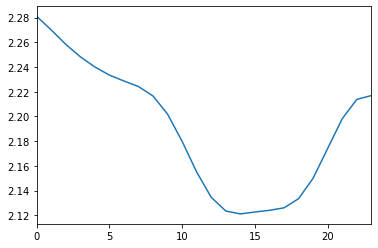

In [300]:
pd.Series(y_pred_test).plot()

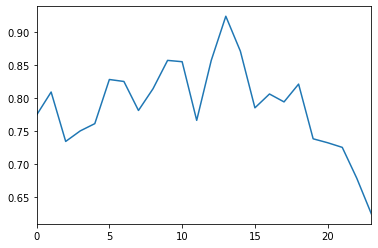

In [301]:
pd.Series(list(df3.iloc[(365*2-1)*24:].y.head(24))).plot()

In [279]:
#mean_absolute_error(df3.iloc[(365-1)*24:].y.head(960), y_pred_test)

mean_absolute_error(df3.iloc[(365*2-1)*24:].y.head(96), y_pred_test)


1.3589578640957338

In [103]:
m = Prophet()

In [104]:
m

In [100]:
data

,ds,y
0,2015-09-01,0.43
1,2015-09-01,0.43
2,2015-09-01,0.43
3,2015-09-01,0.43
4,2015-09-01,0.43
5,2015-09-01,0.44
6,2015-09-01,0.49
7,2015-09-01,0.57
8,2015-09-01,0.57
9,2015-09-01,0.53


In [98]:
df3.iloc[[ 0,  1 , 2,  3 , 4  ,5  ,6 , 7 , 8 , 9 ,10 ,11 ,12, 13, 14, 15 ,16, 17, 18, 19, 20, 21 ,22, 23], :]

,ds,y
0,2015-09-01,0.43
1,2015-09-01,0.43
2,2015-09-01,0.43
3,2015-09-01,0.43
4,2015-09-01,0.43
5,2015-09-01,0.44
6,2015-09-01,0.49
7,2015-09-01,0.57
8,2015-09-01,0.57
9,2015-09-01,0.53


In [ ]:
[ 0,  1 , 2,  3 , 4  ,5  ,6 , 7 , 8 , 9 ,10 ,11 ,12, 13, 14, 15 ,16, 17, 18, 19, 20, 21 ,22, 23]

## Временной ряд

In [17]:
df2 = df[['Дата', 'Характерный час', 'Торговый час', 'Фактическое собственное потребление, МВтч']]

In [24]:
#df2 = df2.dropna()
df2

,Дата,Характерный час,Торговый час,"Фактическое собственное потребление, МВтч",MA
0,2015-09-01,1,0,0.430,0.877
1,2015-09-01,1,1,0.430,0.861
2,2015-09-01,1,2,0.430,0.867
3,2015-09-01,1,3,0.430,0.869
4,2015-09-01,1,4,0.430,0.858
...,...,...,...,...,...
20443,2017-12-30,0,19,0.213,0.159
20444,2017-12-30,0,20,0.207,0.152
20445,2017-12-30,0,21,0.197,0.154
20446,2017-12-30,1,22,0.199,0.146


In [19]:
df2['MA'] = df2['Фактическое собственное потребление, МВтч']

C:\Users\SapronovYD\AppData\Local\conda\conda\envs\virtual_env_GABB\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df2['MA'] = df2['MA'].shift(-24)

C:\Users\SapronovYD\AppData\Local\conda\conda\envs\virtual_env_GABB\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df2 =df2.dropna()

In [25]:
X = df2.drop(['Дата', 'Фактическое собственное потребление, МВтч'], axis=1)
Y = df2['Фактическое собственное потребление, МВтч']

In [26]:
df2.shape

(20448, 5)

In [44]:
from sklearn.model_selection import TimeSeriesSplit

#tscv = TimeSeriesSplit(max_train_size= None, n_splits=10)

tscv = TimeSeriesSplit(max_train_size= 720, n_splits=851)
print(tscv)

TimeSeriesSplit(max_train_size=720, n_splits=851)


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

import time

y_pres_train = []
y_pred_test = []
ss_mae = []
start_time = time.time()

#GB_regr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6) time:  6220
GB_regr = GradientBoostingRegressor()

for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    print("TRAIN:", X_train.shape, "TEST:", X_test.shape)
    
    GB_regr.fit(X_train, y_train)
    y_pred_test += list(GB_regr.predict(X_test))

    #ss_mae.append(mean_absolute_error(y_test, GB_regr.predict(X_test)))

y_pred_train = GB_regr.predict(X_train)
y_pred_test_last = GB_regr.predict(X_test)
print('time: ', time.time() - start_time)  

TRAIN: (24, 3) TEST: (24, 3)
TRAIN: (48, 3) TEST: (24, 3)
TRAIN: (72, 3) TEST: (24, 3)
TRAIN: (96, 3) TEST: (24, 3)
TRAIN: (120, 3) TEST: (24, 3)
TRAIN: (144, 3) TEST: (24, 3)
TRAIN: (168, 3) TEST: (24, 3)
TRAIN: (192, 3) TEST: (24, 3)
TRAIN: (216, 3) TEST: (24, 3)
TRAIN: (240, 3) TEST: (24, 3)
TRAIN: (264, 3) TEST: (24, 3)
TRAIN: (288, 3) TEST: (24, 3)
TRAIN: (312, 3) TEST: (24, 3)
TRAIN: (336, 3) TEST: (24, 3)
TRAIN: (360, 3) TEST: (24, 3)
TRAIN: (384, 3) TEST: (24, 3)
TRAIN: (408, 3) TEST: (24, 3)
TRAIN: (432, 3) TEST: (24, 3)
TRAIN: (456, 3) TEST: (24, 3)
TRAIN: (480, 3) TEST: (24, 3)
TRAIN: (504, 3) TEST: (24, 3)
TRAIN: (528, 3) TEST: (24, 3)
TRAIN: (552, 3) TEST: (24, 3)
TRAIN: (576, 3) TEST: (24, 3)
TRAIN: (600, 3) TEST: (24, 3)
TRAIN: (624, 3) TEST: (24, 3)
TRAIN: (648, 3) TEST: (24, 3)
TRAIN: (672, 3) TEST: (24, 3)
TRAIN: (696, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3

TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (72

TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (72

TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
TRAIN: (720, 3) TEST: (24, 3)
time:  20.54339861869812


In [31]:
len(y_pred_test)

20470

In [32]:
Y.shape

(20471,)

In [51]:
mean_absolute_error(Y.iloc[24:], y_pred_test)

0.9262015037630237

In [47]:
mean_absolute_error(y_test, y_pred_test_last)

0.13525343133130438

In [48]:
mean_absolute_error(y_train, y_pred_train)

0.5806631145204549

## Если последовательно

In [33]:
mean_absolute_error(Y.iloc[1:], y_pred_test)

0.17306530385814461

In [34]:
mean_absolute_error(y_test, y_pred_test_last)

0.012472287203041721

In [35]:
mean_absolute_error(y_train, y_pred_train)

0.011481391738220957

In [36]:
pd.concat([df2.iloc[1:], pd.Series(y_pred_test)], axis = 1)

,Дата,Характерный час,Торговый час,"Фактическое собственное потребление, МВтч",MA,0
0,NaT,NaN,NaN,NaN,NaN,0.430000
1,2015-09-01,1.0,1.0,0.430,0.430,0.430000
2,2015-09-01,1.0,2.0,0.430,0.430,0.430000
3,2015-09-01,1.0,3.0,0.430,0.430,0.430000
4,2015-09-01,1.0,4.0,0.430,0.440,0.430000
...,...,...,...,...,...,...
20466,2017-12-31,0.0,18.0,0.157,0.159,0.164675
20467,2017-12-31,0.0,19.0,0.159,0.152,0.160479
20468,2017-12-31,0.0,20.0,0.152,0.154,0.158172
20469,2017-12-31,0.0,21.0,0.154,0.146,0.158472
